# Plotting Dataset Information

In [21]:
import os

# Change directory to current file path (define __file__ first)
os.chdir('/cephyr/users/ribes/Alvis/PROTAC-Degradation-Predictor/notebooks/')
!pwd

/cephyr/users/ribes/Alvis/PROTAC-Degradation-Predictor/notebooks


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

def increase_saturation(hex_color, increase_by=0.3):
    # Convert hex to RGB
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    # Convert RGB to HSV
    hsv = colorsys.rgb_to_hsv(rgb[0]/255, rgb[1]/255, rgb[2]/255)
    # Increase saturation
    new_saturation = min(hsv[1] + increase_by, 1)  # Ensure saturation doesn't exceed 1
    # Convert back to RGB and then to hex
    new_rgb = colorsys.hsv_to_rgb(hsv[0], new_saturation, hsv[2])
    new_hex = '#' + ''.join(f'{int(c*255):02X}' for c in new_rgb)
    return new_hex

def darken_color(hex_color, darkening_factor=1.0):
    # Convert hex to RGB
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    # Darken color
    new_rgb = [(color * darkening_factor) for color in rgb]

    # Convert RGB back to hex
    new_hex = '#' + ''.join(f'{int(c):02X}' for c in new_rgb)
    return new_hex

palette = [
    '#D0E4FE', # blue
    '#FFCC99', # orange
    '#C4EDAF', # green
    '#FFCCFF', # pink
]


# Adjusted palette
palette = adjusted_palette = [increase_saturation(color) for color in palette]
print(adjusted_palette)

['#83B8FE', '#FFA54C', '#94ED67', '#FF7FFF']


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

palette = [
    '#D0E4FE', # blue
    '#FFCC99', # orange
    '#C4EDAF', # green
    '#FFCCFF', # pink
]

In [24]:
protac_df = pd.read_csv('../data/PROTAC-Degradation-DB.csv')
protac_df['E3 Ligase'] = protac_df['E3 Ligase'].str.replace('Iap', 'IAP')
protac_df

,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,Name,Assay (DC50/Dmax),Exact Mass,XLogP3,Target (Parsed),POI Sequence,E3 Ligase Uniprot,E3 Ligase Sequence,Cell Line Identifier,Active - OR
0,1,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C73H88ClF3N10O10S4/c1-47(49-13-15-51(...,SXPDUCVNMGMWBJ-FMZBIETASA-N,1486.282,101,10,24,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
1,2,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C74H90ClF3N10O10S4/c1-48(50-13-15-52(...,HQKUMELJMUNTTF-NMKDNUEVSA-N,1500.309,102,10,25,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
2,3,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C75H92ClF3N10O10S4/c1-49(51-16-18-53(...,ATQCEJKUPSBDMA-QARNUTPLSA-N,1514.336,103,10,26,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
3,4,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C76H94ClF3N10O10S4/c1-50(52-17-19-54(...,FNKQAGMHNFFSEI-DTTPTBRMSA-N,1528.363,104,10,27,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,NaN
4,5,Q07817,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C77H96ClF3N10O10S4/c1-51(53-18-20-55(...,PXVFFBGSTYQHRO-REQIQPEASA-N,1542.390,105,10,28,...,NaN,NaN,NaN,NaN,NaN,MSQSNRELVVDFLSYKLSQKGYSWSQFSDVEENRTEAPEGTESEME...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,MOLT-4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,2342,O60885,Cc1ncsc1-c1ccc(CNC(=O)[C@@H]2C[C@@H](O)CN2C(=O...,VHL,InChI=1S/C50H61ClN8O8S2/c1-29-31(3)69-49-42(29...,VRVWHAZIBGEPEK-DPSJZEHMSA-N,1001.673,69,7,20,...,NaN,Degradation of BRD4 long in HEK293 cells after...,1000.374231,6.76,BRD4 long,MSAESGPGTRLRNLPVMGDGLETSQMSTTQAQAQPQPANAASTNPP...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,HEK293,True
2137,2887,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCCOCCO...,VHL,InChI=1S/C58H75F3N10O10S/c1-37(39-12-14-40(15-...,FOOHAGZPIHCYKX-ZSFXBAAMSA-N,1161.359,82,7,27,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1160.534044,6.81,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,False
2138,2889,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCCOCC(=O)...,VHL,InChI=1S/C54H67F3N10O8S/c1-33(35-12-14-36(15-1...,RDCVMTUYWQXPEC-FSHOLZCKSA-N,1073.253,76,7,21,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1072.481615,7.11,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,False
2139,2890,Q05397,CNC(=O)c1ccccc1Nc1cc(Nc2ccc(N3CCN(CCOCC(=O)N[C...,VHL,InChI=1S/C52H63F3N10O7S/c1-31(33-12-14-34(15-1...,SLSLLSIRBMAERC-MGVZSLQJSA-N,1029.200,73,7,18,...,NaN,Degradation of FAK in A549 cells after 24 h tr...,1028.455400,7.26,FAK,MAAAYLDPNLNHTPNSSTKTHLGTGMERSPGAMERVLKVFHYFESN...,P40337,MPRRAENWDEAEVGAEEAGVEEYGPEEDGGEESGAEESGPEESGPE...,A549 Cas9,True


Number of non-nan Dmax/DC50 values: Dmax (%)      812
DC50 (nM)    1350
dtype: int64


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


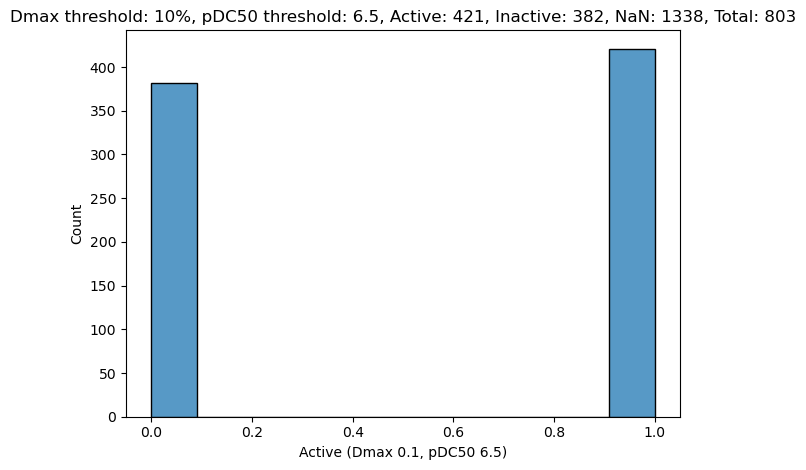

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


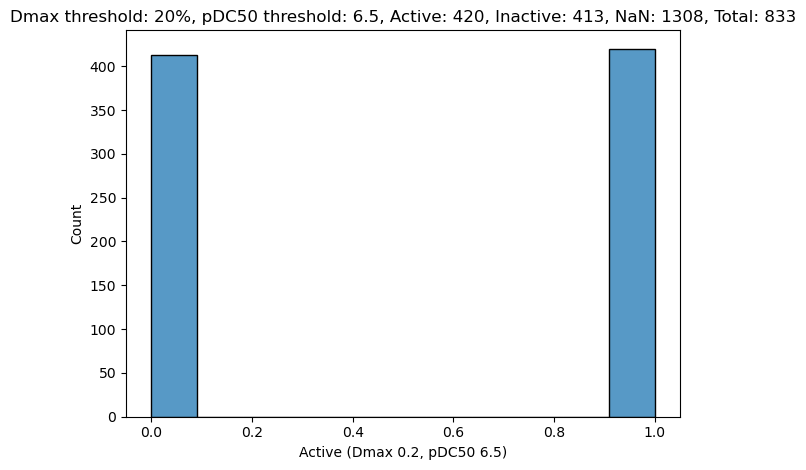

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


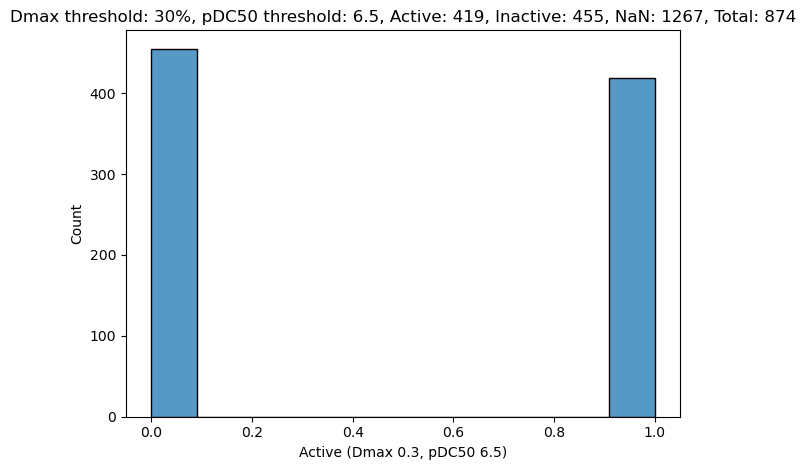

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


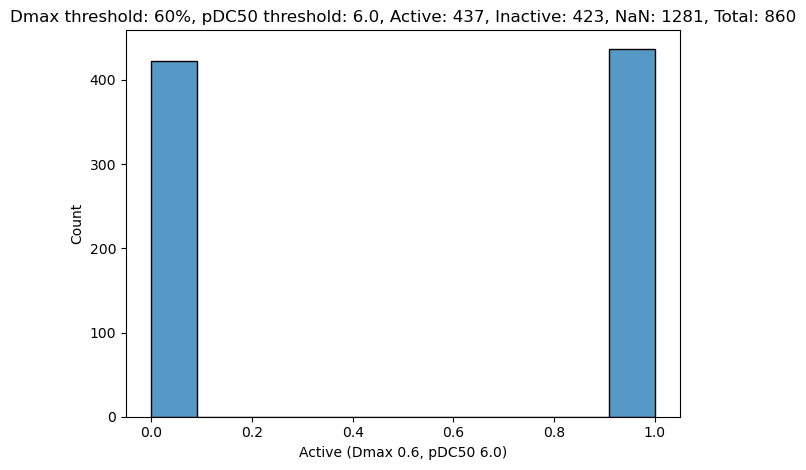

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


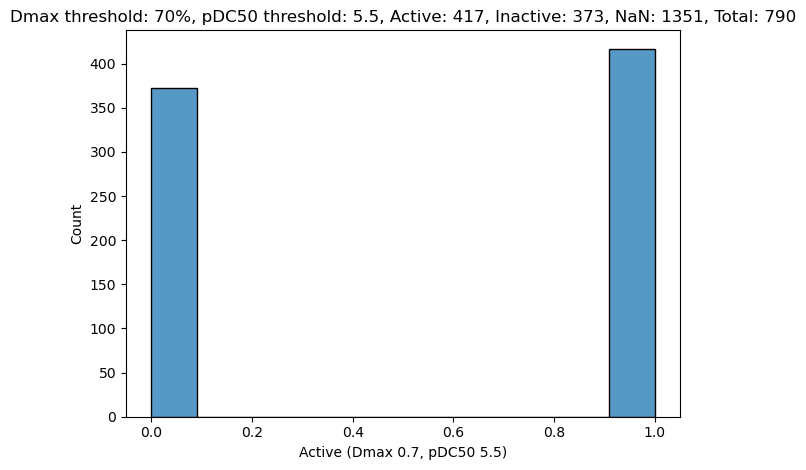

In [3]:
import numpy as np

def is_active(DC50: float, Dmax: float, oring=False, pDC50_threshold=7.0, Dmax_threshold=0.8) -> bool:
    """ Check if a PROTAC is active based on DC50 and Dmax.	
    Args:
        DC50(float): DC50 in nM
        Dmax(float): Dmax in %
    Returns:
        bool: True if active, False if inactive, np.nan if either DC50 or Dmax is NaN
    """
    pDC50 = -np.log10(DC50 * 1e-9) if pd.notnull(DC50) else np.nan
    Dmax = Dmax / 100
    if pd.notnull(pDC50):
        if pDC50 < pDC50_threshold:
            return False
    if pd.notnull(Dmax):
        if Dmax < Dmax_threshold:
            return False
    if oring:
        if pd.notnull(pDC50):
            return True if pDC50 >= pDC50_threshold else False
        elif pd.notnull(Dmax):
            return True if Dmax >= Dmax_threshold else False
        else:
            return np.nan
    else:
        if pd.notnull(pDC50) and pd.notnull(Dmax):
            return True if pDC50 >= pDC50_threshold and Dmax >= Dmax_threshold else False
        else:
            return np.nan

print(f'Number of non-nan Dmax/DC50 values: {protac_df[["Dmax (%)", "DC50 (nM)"]].count()}')

# Add a column for a definition of activivity in which 
for Dmax_threshold in range(10):
    for pDC50_threshold in [5 + 0.5 * i for i in range(10)]:
        protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'] = protac_df.apply(
            lambda x: is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold * 0.1), axis=1
        )
        num_active = protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'].value_counts()
        num_nans = protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'].isnull().sum()
        total = len(protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'])
        # If the number of active, i.e. num_active[True], is close to the number of inactive, i.e. num_active[False],
        # then plot the histogram of the active values with different Dmax and pDC50 definitions
        if abs(num_active[True] - num_active[False]) < 50:
            sns.histplot(protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)}, pDC50 {round(pDC50_threshold, 1)})'].dropna())
            plt.title(f'Dmax threshold: {Dmax_threshold * 0.1:.0%}, pDC50 threshold: {round(pDC50_threshold, 1)}, Active: {num_active[True]}, Inactive: {num_active[False]}, NaN: {num_nans}, Total: {num_active[True] + num_active[False]}')
            plt.tight_layout()
            plt.show()

    # protac_df[f'Active (Dmax {round(Dmax_threshold * 0.1, 1)})'] = protac_df.apply(
    #     lambda x: is_active(x['DC50 (nM)'], x['Dmax (%)'], Dmax_threshold=Dmax_threshold * 0.1, pDC50_threshold=6.5), axis=1
    # )
    # num_active = protac_df[f'Active (Dmax {Dmax_threshold * 0.1})'].value_counts()
    # num_inactive = protac_df[f'Active (Dmax {Dmax_threshold * 0.1})'].isnull().sum()
    # total = len(protac_df[f'Active (Dmax {Dmax_threshold * 0.1})'])
    # # Plot the KDE of the active values with different Dmax definitions
    # plt.figure(figsize=(8, 6))
    # sns.kdeplot(protac_df[f'Active (Dmax {Dmax_threshold * 0.1})'].dropna(), shade=True)
    # plt.title(f'Dmax threshold: {Dmax_threshold * 0.1:.0%}, Active: {num_active[True]}, Inactive: {num_active[False]}, NaN: {num_inactive}, Total: {total}')
    # plt.show()

In [4]:
[c for c in protac_df.columns if 'Active' in c]

['Active',
 'Active - OR',
 'Active (Dmax 0.0, pDC50 5.0)',
 'Active (Dmax 0.0, pDC50 5.5)',
 'Active (Dmax 0.0, pDC50 6.0)',
 'Active (Dmax 0.0, pDC50 6.5)',
 'Active (Dmax 0.0, pDC50 7.0)',
 'Active (Dmax 0.0, pDC50 7.5)',
 'Active (Dmax 0.0, pDC50 8.0)',
 'Active (Dmax 0.0, pDC50 8.5)',
 'Active (Dmax 0.0, pDC50 9.0)',
 'Active (Dmax 0.0, pDC50 9.5)',
 'Active (Dmax 0.1, pDC50 5.0)',
 'Active (Dmax 0.1, pDC50 5.5)',
 'Active (Dmax 0.1, pDC50 6.0)',
 'Active (Dmax 0.1, pDC50 6.5)',
 'Active (Dmax 0.1, pDC50 7.0)',
 'Active (Dmax 0.1, pDC50 7.5)',
 'Active (Dmax 0.1, pDC50 8.0)',
 'Active (Dmax 0.1, pDC50 8.5)',
 'Active (Dmax 0.1, pDC50 9.0)',
 'Active (Dmax 0.1, pDC50 9.5)',
 'Active (Dmax 0.2, pDC50 5.0)',
 'Active (Dmax 0.2, pDC50 5.5)',
 'Active (Dmax 0.2, pDC50 6.0)',
 'Active (Dmax 0.2, pDC50 6.5)',
 'Active (Dmax 0.2, pDC50 7.0)',
 'Active (Dmax 0.2, pDC50 7.5)',
 'Active (Dmax 0.2, pDC50 8.0)',
 'Active (Dmax 0.2, pDC50 8.5)',
 'Active (Dmax 0.2, pDC50 9.0)',
 'Active (Dmax 0

Defining a PROTAC as active when Dmax >= 0.6 and pDC50 >= 6.0 seems to be a good compromise, resulting in a balanced amount of active and inactive entries.

Number of unique samples: 6


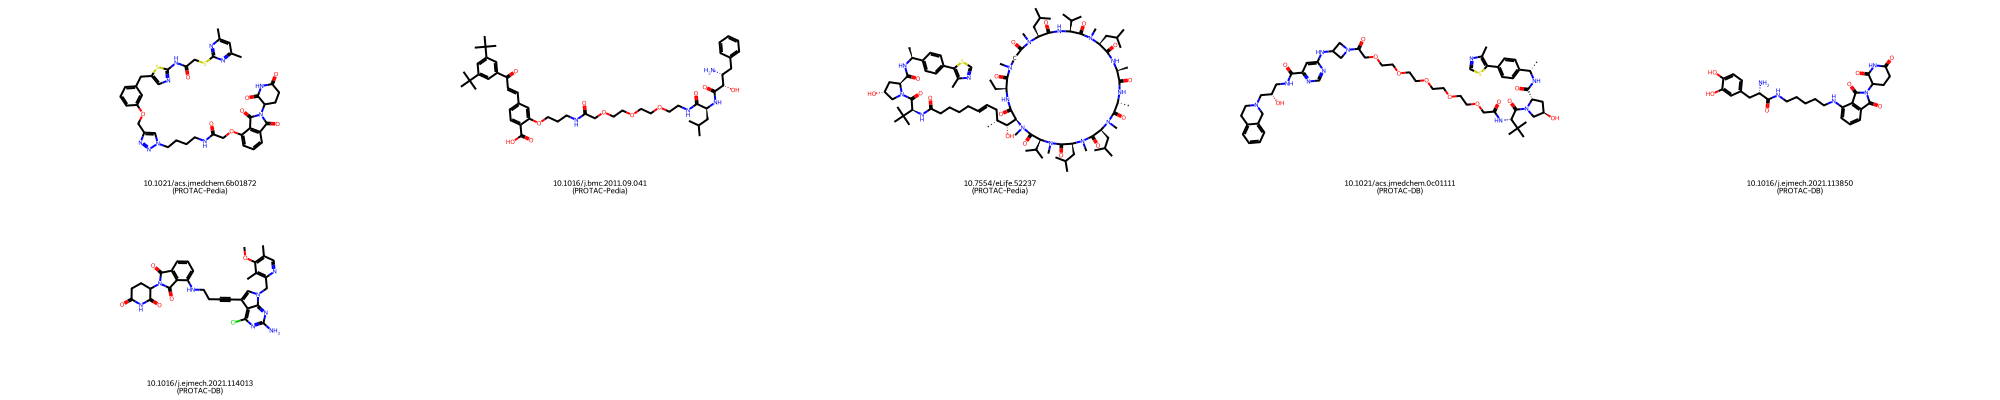

,Active,Active - OR
173,False,False
793,False,False
924,True,True
1606,False,False
1956,False,False
1980,False,False


Percentage of active/inactive PROTACs in test set:
False    0.666667
True     0.333333
Name: Active (Dmax 0.6, pDC50 6.0), dtype: float64


,Compound ID,Uniprot,Smiles,E3 Ligase,InChI,InChI Key,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,...,"Active (Dmax 0.9, pDC50 5.0)","Active (Dmax 0.9, pDC50 5.5)","Active (Dmax 0.9, pDC50 6.0)","Active (Dmax 0.9, pDC50 6.5)","Active (Dmax 0.9, pDC50 7.0)","Active (Dmax 0.9, pDC50 7.5)","Active (Dmax 0.9, pDC50 8.0)","Active (Dmax 0.9, pDC50 8.5)","Active (Dmax 0.9, pDC50 9.0)","Active (Dmax 0.9, pDC50 9.5)"
173,192,Q8IXJ6,Cc1cc(C)nc(SCC(=O)Nc2ncc(Cc3cccc(OCc4cn(CCCCNC...,CRBN,InChI=1S/C40H40N10O8S2/c1-23-15-24(2)44-40(43-...,GRYRXFYWVDWPQY-UHFFFAOYSA-N,852.956,60,7,18,...,False,False,False,False,False,False,False,False,False,False
793,1016,P10276,CC(C)C[C@H](NC(=O)[C@@H](O)[C@H](N)Cc1ccccc1)C...,cIAP1,InChI=1S/C51H72N4O11/c1-34(2)27-42(55-48(60)46...,ZAOSGDCLGNWLSI-ACALULJJSA-N,917.154,66,3,28,...,True,False,False,False,False,False,False,False,False,False
924,1215,P62937,CC[C@@H]1NC(=O)[C@H]([C@H](O)[C@H](C)C/C=C/CCC...,VHL,InChI=1S/C89H147N15O16S/c1-29-63-83(115)97(22)...,RSBPUBFGFMTCCP-NIDZIXQMSA-N,1715.311,121,4,26,...,True,True,True,True,True,True,False,False,False,False
1606,1782,O14744,Cc1ncsc1-c1ccc([C@H](C)NC(=O)[C@@H]2C[C@@H](O)...,VHL,InChI=1S/C55H76N10O12S/c1-36(38-10-12-40(13-11...,XUJMNOQMXWVXQE-STHBVIMFSA-N,1101.338,78,7,29,...,False,False,False,False,False,False,False,False,False,False
1956,2672,P14679,N[C@@H](Cc1ccc(O)c(O)c1)C(=O)NCCCCCNc1cccc2c1C...,CRBN,InChI=1S/C27H31N5O7/c28-17(13-15-7-9-20(33)21(...,GTUJRUVNUQLCDT-KKFHFHRHSA-N,537.573,39,4,11,...,False,False,False,False,False,False,False,False,False,False
1980,2720,P07900,COc1c(C)cnc(Cn2cc(C#CCCNc3cccc4c3C(=O)N(C3CCC(...,CRBN,InChI=1S/C32H29ClN8O5/c1-16-13-36-21(17(2)26(1...,ZSERQSKFLSKTGE-UHFFFAOYSA-N,641.088,46,6,7,...,False,False,False,False,False,False,False,False,False,False


In [5]:
from rdkit import Chem
from rdkit.Chem import Draw


active_col = f'Active (Dmax 0.6, pDC50 6.0)'
active_df = protac_df[protac_df[active_col].notna()]

# Find the samples that:
# * have their SMILES appearing only once in the dataframe
# * have their Uniprot appearing only once in the dataframe
# * have their (Smiles, Uniprot) pair appearing only once in the dataframe
unique_smiles = active_df['Smiles'].value_counts() == 1
unique_uniprot = active_df['Uniprot'].value_counts() == 1
unique_smiles_uniprot = active_df.groupby(['Smiles', 'Uniprot']).size() == 1

# Get the indices of the unique samples
unique_smiles_idx = active_df['Smiles'].map(unique_smiles)
unique_uniprot_idx = active_df['Uniprot'].map(unique_uniprot)
unique_smiles_uniprot_idx = active_df.set_index(['Smiles', 'Uniprot']).index.map(unique_smiles_uniprot)

# Cross the indices to get the unique samples
unique_samples = active_df[unique_smiles_idx & unique_uniprot_idx & unique_smiles_uniprot_idx].index
# unique_samples = active_df[unique_smiles_idx & unique_uniprot_idx].index
test_df = active_df.loc[unique_samples]

# Reporting
print(f'Number of unique samples: {len(unique_samples)}')
img = Draw.MolsToGridImage(
    [Chem.MolFromSmiles(s) for s in test_df['Smiles']],
    molsPerRow=5,
    subImgSize=(400, 200),
    legends=[f'{u}\n({s})' for u, s in zip(test_df['Article DOI'], test_df['Database'])],
)
display(img)
display(test_df[['Active', 'Active - OR']])
print(f'Percentage of active/inactive PROTACs in test set:\n{test_df[active_col].value_counts(normalize=True)}')
test_df

C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Uniprot                                               O60885
Number of entries                                         55
Number of entries per E3 ligase                            5
Number of entries with same SMILES                        69
Number of entries with same SMILES and not Uniprot        14
Number of active entries                                  41
Number of inactive entries                                14
Name: 2, dtype: object

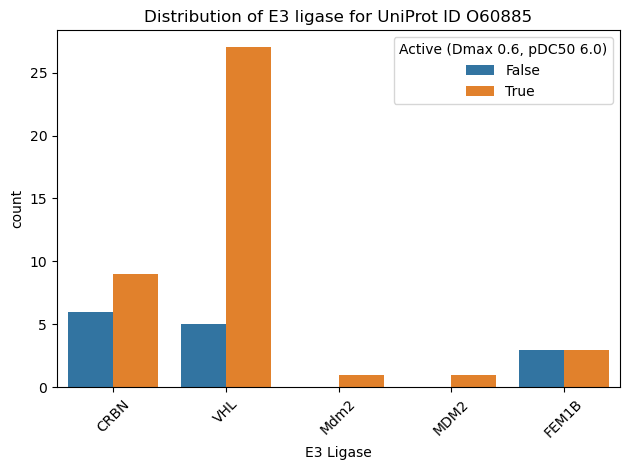

C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Uniprot                                               P00533
Number of entries                                         45
Number of entries per E3 ligase                            4
Number of entries with same SMILES                        45
Number of entries with same SMILES and not Uniprot         0
Number of active entries                                  22
Number of inactive entries                                23
Name: 3, dtype: object

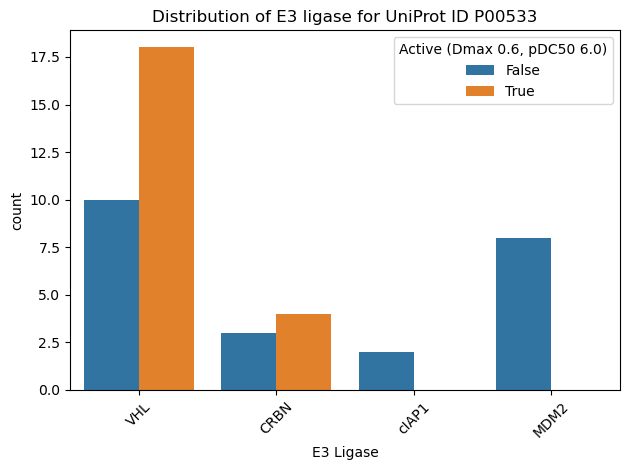

C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Uniprot                                               P10275
Number of entries                                        107
Number of entries per E3 ligase                            3
Number of entries with same SMILES                       107
Number of entries with same SMILES and not Uniprot         0
Number of active entries                                  66
Number of inactive entries                                41
Name: 0, dtype: object

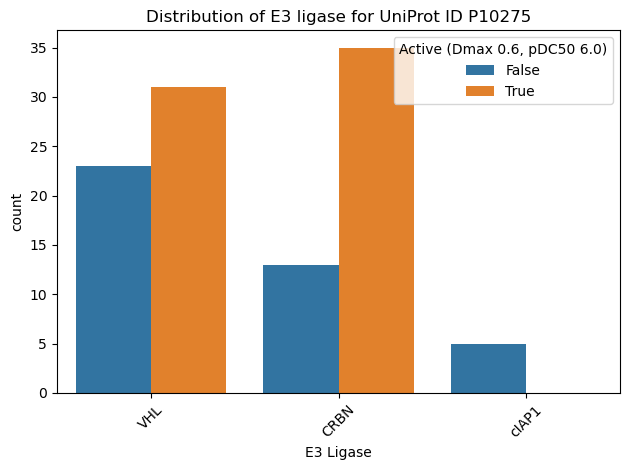

C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Uniprot                                               O43353
Number of entries                                          5
Number of entries per E3 ligase                            3
Number of entries with same SMILES                         5
Number of entries with same SMILES and not Uniprot         0
Number of active entries                                   5
Number of inactive entries                                 0
Name: 36, dtype: object

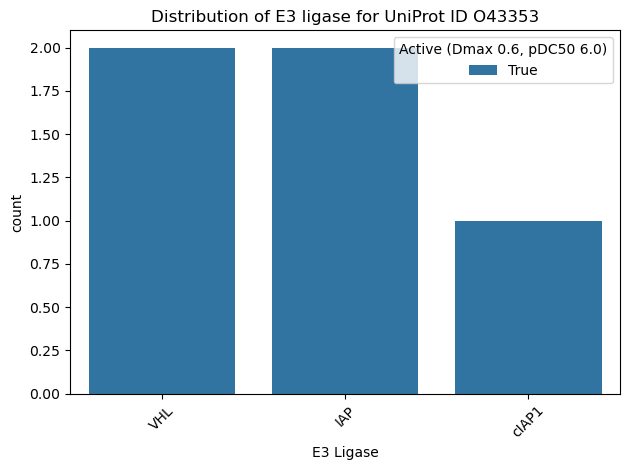

C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
C:\Users\ste\AppData\Local\Temp\ipykernel_16240\2323036171.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Uniprot                                               P00520
Number of entries                                         16
Number of entries per E3 ligase                            3
Number of entries with same SMILES                        17
Number of entries with same SMILES and not Uniprot         1
Number of active entries                                   1
Number of inactive entries                                15
Name: 16, dtype: object

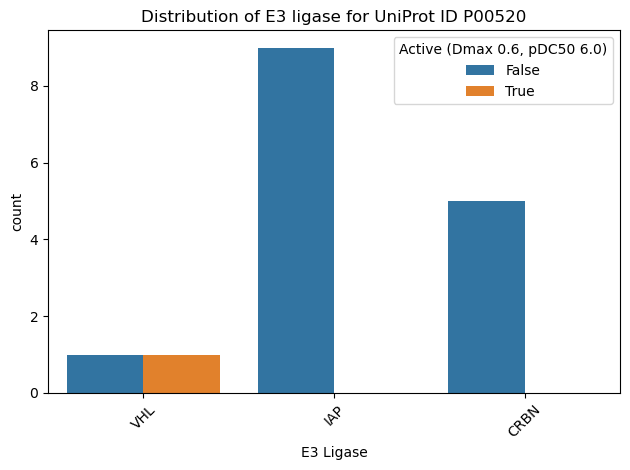

In [6]:
# In active_df, for each uniprot ID, count the corresponding number of entries,
# then count its corresponding number of entries per E3 ligase. The final dataframe
# should have the following columns:
# * Uniprot
# * Number of entries
# * Number of entries per E3 ligase type (e.g. CRL, VHL, etc.)
test_candidate_df = active_df['Uniprot'].value_counts().reset_index()
test_candidate_df.columns = ['Uniprot', 'Number of entries']
test_candidate_df['Number of entries per E3 ligase'] = test_candidate_df['Uniprot'].map(active_df.groupby('Uniprot')['E3 Ligase'].nunique())
# Sort by the number of entries per E3 ligase
test_candidate_df = test_candidate_df.sort_values('Number of entries per E3 ligase', ascending=False)
# Take the first row, then get all the SMILES associated to that Uniprot ID
for row_idx in range(5):
    uniprot_id = test_candidate_df['Uniprot'].iloc[row_idx]
    smiles = active_df[active_df['Uniprot'] == uniprot_id]['Smiles']
    # Get the entries in active_df that have the same SMILES but NOT the same Uniprot ID
    uniprot_count = test_candidate_df.iloc[row_idx]
    # uniprot_count['SMILES'] = smiles
    uniprot_count['Number of entries with same SMILES'] = active_df[active_df['Smiles'].isin(smiles)].shape[0]
    uniprot_count['Number of entries with same SMILES and not Uniprot'] = active_df[active_df['Smiles'].isin(smiles) & (active_df['Uniprot'] != uniprot_id)].shape[0]
    # Get the number of active and inactive entries with the same UniProt ID
    uniprot_count['Number of active entries'] = active_df[(active_df['Uniprot'] == uniprot_id) & (active_df[active_col] == True)].shape[0]
    uniprot_count['Number of inactive entries'] = active_df[(active_df['Uniprot'] == uniprot_id) & (active_df[active_col] == False)].shape[0]
    display(uniprot_count)
    # Plot the distribution of E3 in active_df[active_df['Uniprot'] == uniprot_id]
    sns.countplot(data=active_df[active_df['Uniprot'] == uniprot_id], x='E3 Ligase', hue=active_col)
    plt.title(f'Distribution of E3 ligase for UniProt ID {uniprot_id}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Isolating _all_ entries with Uniprot ID (target) corresponding to P00533 seems to be a good addition to the test set. In fact, it has a balanced distribution of active and inactive entries, plus, the E3 ligase distribution is also quite balanced.

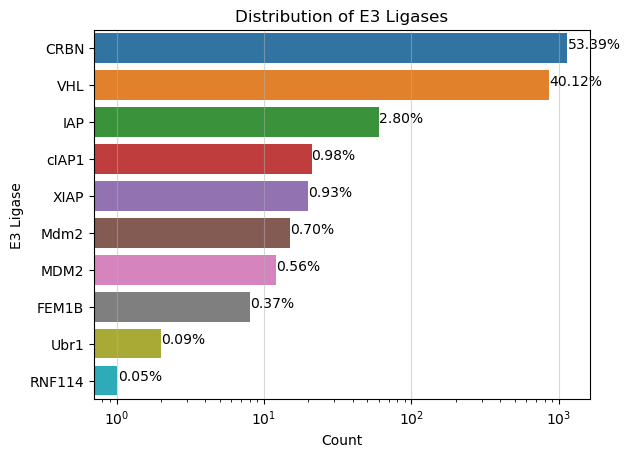

In [7]:
# Plot the distribution (in percentage) of E3 ligases
warnings.filterwarnings('ignore')
ax = sns.countplot(y='E3 Ligase', data=protac_df, order=protac_df['E3 Ligase'].value_counts().index)
total = len(protac_df['E3 Ligase'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))
# Set the x-axis to log scale
plt.xscale('log')
plt.title('Distribution of E3 Ligases')
plt.xlabel('Count')
plt.ylabel('E3 Ligase')
plt.grid(axis='x', alpha=0.5)
plt.show()

In [8]:
import h5py
import numpy as np
from tqdm.auto import tqdm

protein_embeddings = {}
with h5py.File("../data/uniprot2embedding.h5", "r") as file:
    print(f"number of entries: {len(file.items()):,}")
    uniprots = protac_df['Uniprot'].unique().tolist()
    uniprots += protac_df['E3 Ligase Uniprot'].unique().tolist()
    for i, sequence_id in tqdm(enumerate(uniprots), desc='Loading protein embeddings'):
        try:
            embedding = file[sequence_id][:]
            protein_embeddings[sequence_id] = np.array(embedding)
            if i < 10:
                print(
                    f"\tid: {sequence_id}, "
                    f"\tembeddings shape: {embedding.shape}, "
                    f"\tembeddings mean: {np.array(embedding).mean()}"
                )
        except KeyError:
            print(f'KeyError for {sequence_id}')
            protein_embeddings[sequence_id] = np.zeros((1024,))

number of entries: 20,594


Loading protein embeddings: 0it [00:00, ?it/s]

	id: Q07817, 	embeddings shape: (1024,), 	embeddings mean: -0.0005679130554199219
	id: P00533, 	embeddings shape: (1024,), 	embeddings mean: 0.001171112060546875
	id: Q9NWZ3, 	embeddings shape: (1024,), 	embeddings mean: 0.00041985511779785156
	id: P00519, 	embeddings shape: (1024,), 	embeddings mean: 0.0009603500366210938
	id: P11474, 	embeddings shape: (1024,), 	embeddings mean: -0.0018215179443359375
	id: Q16288, 	embeddings shape: (1024,), 	embeddings mean: 0.0010194778442382812
	id: O60674, 	embeddings shape: (1024,), 	embeddings mean: 0.0015687942504882812
	id: Q06187, 	embeddings shape: (1024,), 	embeddings mean: 0.0006914138793945312
	id: Q9UHD2, 	embeddings shape: (1024,), 	embeddings mean: 0.0012235641479492188
	id: Q8IXJ6, 	embeddings shape: (1024,), 	embeddings mean: -0.00042366981506347656
KeyError for P31750
KeyError for P00520
KeyError for A8DG50


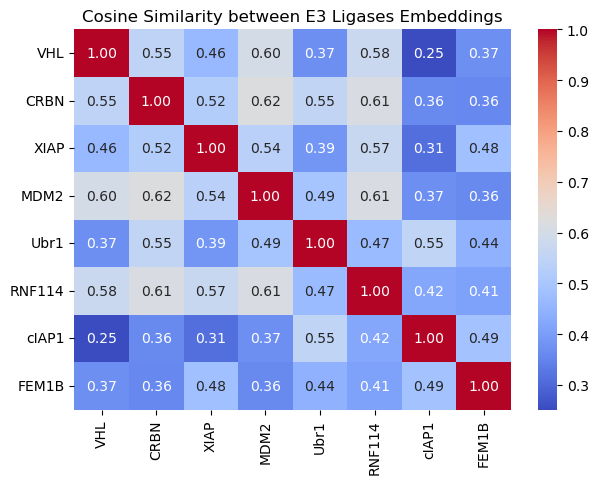

In [9]:
# Calculate the cosine similarity between E3 ligases embeddings
from sklearn.metrics.pairwise import cosine_similarity

# Create a name mapping for the E3 ligases names and their uniprots
e3_ligase_uniprot_mapping = protac_df[['E3 Ligase', 'E3 Ligase Uniprot']].drop_duplicates()
e3_ligase_uniprot_mapping = e3_ligase_uniprot_mapping.set_index('E3 Ligase Uniprot').to_dict()['E3 Ligase']
# Calculate the cosine similarity between E3 ligases embeddings
e3_ligase_embeddings = {}
for e3_ligase_uniprot in e3_ligase_uniprot_mapping.keys():
    e3_ligase_embeddings[e3_ligase_uniprot] = protein_embeddings[e3_ligase_uniprot]
e3_ligase_similarity = pd.DataFrame(cosine_similarity(list(e3_ligase_embeddings.values())), columns=e3_ligase_uniprot_mapping.values())
# Set the index and columns of the cosine similarity dataframe as the E3 ligases names
e3_ligase_similarity.index = e3_ligase_uniprot_mapping.values()
# e3_ligase_similarity = e3_ligase_similarity.rename(columns=e3_ligase_uniprot_mapping)
# Plot the cosine similarity between E3 ligases embeddings as it was a correlation matrix,
# only the lower triangle is shown
sns.heatmap(e3_ligase_similarity, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.title('Cosine Similarity between E3 Ligases Embeddings')
plt.show()

You can use a sequence similarity tool to double check which E3s are similar to each others.

In [10]:
# Add pDC50 column to the PROTAC dataframe
protac_df['pDC50'] = protac_df['DC50 (nM)'].apply(lambda x: -1 * np.log10(x * 1e-9))

In [11]:
protac_df.columns

Index(['Compound ID', 'Uniprot', 'Smiles', 'E3 Ligase', 'InChI', 'InChI Key',
       'Molecular Weight', 'Heavy Atom Count', 'Ring Count',
       'Rotatable Bond Count',
       ...
       'Active (Dmax 0.9, pDC50 5.5)', 'Active (Dmax 0.9, pDC50 6.0)',
       'Active (Dmax 0.9, pDC50 6.5)', 'Active (Dmax 0.9, pDC50 7.0)',
       'Active (Dmax 0.9, pDC50 7.5)', 'Active (Dmax 0.9, pDC50 8.0)',
       'Active (Dmax 0.9, pDC50 8.5)', 'Active (Dmax 0.9, pDC50 9.0)',
       'Active (Dmax 0.9, pDC50 9.5)', 'pDC50'],
      dtype='object', length=136)

In [12]:
def is_active(DC50: float, Dmax: float, oring=False, pDC50_threshold=7.0, Dmax_threshold=0.8) -> bool:
    """ Check if a PROTAC is active based on DC50 and Dmax.	
    Args:
        DC50(float): DC50 in nM
        Dmax(float): Dmax in %
    Returns:
        bool: True if active, False if inactive, np.nan if either DC50 or Dmax is NaN
    """
    pDC50 = -np.log10(DC50 * 1e-9) if pd.notnull(DC50) else np.nan
    Dmax = Dmax / 100
    if pd.notnull(pDC50):
        if pDC50 < pDC50_threshold:
            return False
    if pd.notnull(Dmax):
        if Dmax < Dmax_threshold:
            return False
    if oring:
        if pd.notnull(pDC50):
            return True if pDC50 >= pDC50_threshold else False
        elif pd.notnull(Dmax):
            return True if Dmax >= Dmax_threshold else False
        else:
            return np.nan
    else:
        if pd.notnull(pDC50) and pd.notnull(Dmax):
            return True if pDC50 >= pDC50_threshold and Dmax >= Dmax_threshold else False
        else:
            return np.nan


active_col = 'Active (Dmax 0.6, pDC50 6.0)',
protac_df[active_col] = protac_df.apply(
    lambda x: is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold), axis=1
)
tot_len = len(protac_df.dropna(subset=active_col))
tot_len

860

\begin{tabular}{lrrrr}
\toprule
E3 ligase &  E3 ligase (\%) &  Unique PROTACs (\% per E3) &  Unique targets (\% per E3) &  Unique cell lines (\% per E3) \\
\midrule
      VHL &           43.8 &                       41.2 &                       58.0 &                          60.2 \\
     CRBN &           50.7 &                       52.2 &                       77.0 &                          79.7 \\
    Other &            5.5 &                        6.6 &                       15.0 &                          10.5 \\
\bottomrule
\end{tabular}



,E3 ligase,E3 ligase (%),Unique PROTACs (% per E3),Unique targets (% per E3),Unique cell lines (% per E3)
0,VHL,43.792464,41.164659,58.0,60.150376
1,CRBN,50.710315,52.208835,77.0,79.699248
2,Other,5.497221,6.626506,15.0,10.526316


E3 ligase                       VHLCRBNOther
E3 ligase (%)                          100.0
Unique PROTACs (% per E3)              100.0
Unique targets (% per E3)              150.0
Unique cell lines (% per E3)       150.37594
dtype: object

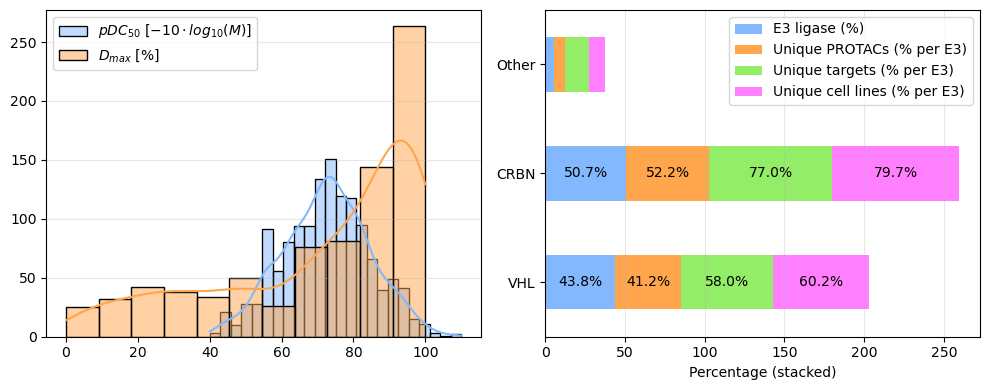

NOTE: The $$pDC_{50}$$ values are scaled by 10 to better show it next to the $$D_{max}$$ distribution.
NOTE: Some percentages do not "add up" because the same target might be "associated to"/"attacked by" multiple E3 ligases or tested in multiple cell lines.


In [15]:
# Plot the Dmax (%) and DC50 (nM) distributions side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# ax_idx = 0
# sns.histplot(protac_df['pDC50'], bins=20, ax=axes[ax_idx], kde=False, color=palette[0])
# # axes[ax_idx].set_title('pDC50 Distribution')
# axes[ax_idx].set_xlabel('$pDC_{50}$ [$-log_{10}(M)$]')
# axes[ax_idx].set_ylabel('Count')
# axes[ax_idx].grid(axis='y', alpha=0.3)

# ax_idx = 1
# sns.histplot(protac_df['Dmax (%)'], bins=20, ax=axes[ax_idx], kde=False, color=palette[1])
# # axes[ax_idx].set_title('Dmax (%) Distribution')
# axes[ax_idx].set_xlabel('$D_{max}$ [%]')
# # Remove y-axis
# axes[ax_idx].set_ylabel('')
# axes[ax_idx].grid(axis='y', alpha=0.3)

# Plot the Dmax (%) and DC50 (nM) distributions in one plot, in axes[ax_idx == 1]
ax_idx = 0
# sns.kdeplot(protac_df['pDC50'] * 10, ax=axes[ax_idx], color=palette[0], label='$pDC_{50}$ [$-10 \cdot log_{10}(M)$]', fill=True, alpha=0.5)
# sns.kdeplot(protac_df['Dmax (%)'], ax=axes[ax_idx], color=palette[1], label='$D_{max}$ [%]', fill=True, alpha=0.5)
sns.histplot(protac_df['pDC50'] * 10, ax=axes[ax_idx], color=palette[0], label='$pDC_{50}$ [$-10 \cdot log_{10}(M)$]', fill=True, alpha=0.5, kde=True)
sns.histplot(protac_df['Dmax (%)'], ax=axes[ax_idx], color=palette[1], label='$D_{max}$ [%]', fill=True, alpha=0.5, kde=True)
axes[ax_idx].set_xlabel('')
axes[ax_idx].set_ylabel('')
axes[ax_idx].legend(loc='upper left')
axes[ax_idx].grid(axis='y', alpha=0.3)


# # Plot the E3 ligase distribution
# ax_idx = 3
# sns.countplot(y='E3 Ligase', data=protac_df, ax=axes[ax_idx], order=protac_df['E3 Ligase'].value_counts().index, color=palette[2])
# axes[ax_idx].set_xscale('log')
# axes[ax_idx].set_xlabel('Count')
# axes[ax_idx].set_ylabel('E3 Ligase')
# axes[ax_idx].grid(axis='x', alpha=0.5)

# Create a new dataframe for which, for each E3 ligase name, we have:
# - the percentage of unique PROTACs associated to it
# - The percentage of unique POI associated to it
# - The percentage of unique cell lines associated to it
tmp = protac_df[protac_df[active_col].notna()].copy()
tmp['E3 ligase'] = tmp['E3 Ligase'].apply(lambda x: x if x == 'VHL' or x == 'CRBN' else 'Other')
e3_ligase_stats = pd.DataFrame()
e3_ligase_stats['E3 ligase'] = tmp['E3 ligase'].unique()
e3_ligase_stats['E3 ligase (%)'] = e3_ligase_stats['E3 ligase'].apply(
    lambda x: 100 * len(tmp[tmp['E3 ligase'] == x]) / len(tmp['E3 ligase'])
)
e3_ligase_stats['Unique PROTACs (% per E3)'] = e3_ligase_stats['E3 ligase'].apply(
    lambda x: 100 * tmp[tmp['E3 ligase'] == x]['Smiles'].nunique() / tmp['Smiles'].nunique()
)
e3_ligase_stats['Unique targets (% per E3)'] = e3_ligase_stats['E3 ligase'].apply(
    lambda x: 100 * tmp[tmp['E3 ligase'] == x]['Uniprot'].nunique() / tmp['Uniprot'].nunique()
)
e3_ligase_stats['Unique cell lines (% per E3)'] = e3_ligase_stats['E3 ligase'].apply(
    lambda x: 100 * tmp[tmp['E3 ligase'] == x]['Cell Line Identifier'].nunique() / tmp['Cell Line Identifier'].nunique()
)

print(e3_ligase_stats.round(1).to_latex(index=False))
display(e3_ligase_stats)
display(e3_ligase_stats.sum(axis=0))

# stacked Plot the distribution of PROTACs, POI and cell lines associated to each E3 ligase
ax_idx = 1
e3_ligase_stats.plot.barh(x='E3 ligase', y=['E3 ligase (%)', 'Unique PROTACs (% per E3)', 'Unique targets (% per E3)', 'Unique cell lines (% per E3)'],
    stacked=True,
    ax=axes[ax_idx],
    color=adjusted_palette,
    grid=False,
)
axes[ax_idx].set_xlabel('Percentage (stacked)')
axes[ax_idx].set_ylabel('')
axes[ax_idx].legend()
# Set the x-axis to log scale
axes[ax_idx].grid(axis='x', alpha=0.3)
# For 'VHL' and 'CRBN' E3 ligases, show the percentage of PROTACs, POI and cell lines associated to them
# for i, e3_ligase in enumerate(['VHL', 'CRBN']):
#     axes[ax_idx].text(
#         0.5, i, f'{e3_ligase}\n'
#         f'{e3_ligase_stats.loc[e3_ligase_stats["E3 Ligase"] == e3_ligase, "PROTACs (% per E3)"].values[0]:.1f}%',
#         ha='center', va='center', color='black'
#     )
# Put the percentages on top of the bars if the bar corresponding to the E3 ligases 'VHL' and 'CRBN'
for i, p in enumerate(axes[ax_idx].patches):
    if p.get_width() < 20:
        continue
    percentage = '{:.1f}%'.format(p.get_width())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    axes[ax_idx].annotate(percentage, (x, y), ha='center', va='center', color='black')

# # Plot the number of active and inactive PROTACs
# ax_idx = 2
# sns.countplot(x=active_col, data=protac_df, ax=axes[ax_idx], palette=palette[2:])
# # Change the x-axis labels to 'Inactive' and 'Active'
# axes[ax_idx].set_xticklabels(['Inactive', 'Active'])
# axes[ax_idx].set_xlabel('')
# axes[ax_idx].set_ylabel('')
# axes[ax_idx].grid(axis='y', alpha=0.3)
# # Put the percentages on top of the bars
# total = len(protac_df[protac_df[active_col].notna()])
# for p in axes[ax_idx].patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height() / total)
#     x = p.get_x() + p.get_width() / 2
#     y = p.get_height() + 0.02
#     axes[ax_idx].annotate(percentage, (x, y), ha='center')

plt.tight_layout()
plt.savefig('dataset_distributions.pdf', bbox_inches='tight')
plt.show()
print('NOTE: The $$pDC_{50}$$ values are scaled by 10 to better show it next to the $$D_{max}$$ distribution.')
print('NOTE: Some percentages do not "add up" because the same target might be "associated to"/"attacked by" multiple E3 ligases or tested in multiple cell lines.')

In [16]:
# Rename E3 ligase Mdm2 to MDM2
protac_df['E3 Ligase'] = protac_df['E3 Ligase'].str.replace('Mdm2', 'MDM2')
# Percentage of each E3 ligase in the dataset
e3_ligase_percentage = protac_df['E3 Ligase'].value_counts(normalize=True) * 100
e3_ligase_percentage.round(2)

CRBN      53.39
VHL       40.12
IAP        2.80
MDM2       1.26
cIAP1      0.98
XIAP       0.93
FEM1B      0.37
Ubr1       0.09
RNF114     0.05
Name: E3 Ligase, dtype: float64

\begin{tabular}{lrrr}
\toprule
E3 Ligase &  E3 Ligase (\%) &  Active (\%) &  Inactive (\%) \\
\midrule
     CRBN &          53.39 &       49.49 &         50.51 \\
    FEM1B &           0.37 &       50.00 &         50.00 \\
      IAP &           2.80 &       10.00 &         90.00 \\
     MDM2 &           1.26 &       16.67 &         83.33 \\
     Ubr1 &           0.09 &       50.00 &         50.00 \\
      VHL &          40.12 &       56.09 &         43.91 \\
    cIAP1 &           0.98 &        9.09 &         90.91 \\
\bottomrule
\end{tabular}



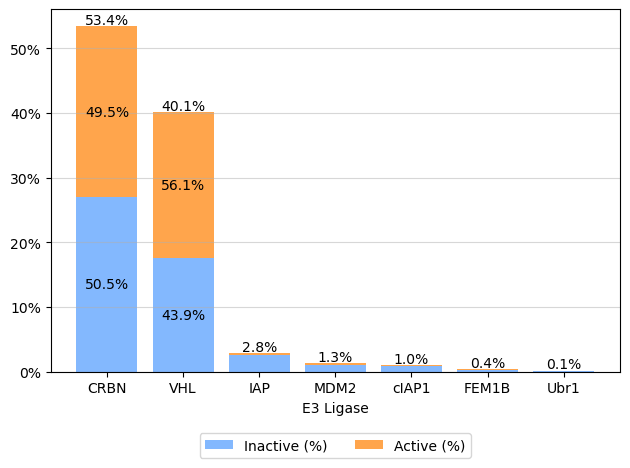

In [65]:
active_col = 'Active (Dmax 0.6, pDC50 6.0)'

# Percentage of True/False in active_col per E3 ligase
tmp = protac_df.groupby('E3 Ligase')[active_col].value_counts(normalize=True).unstack().fillna(0).round(4) * 100
# Rename the columns
tmp.columns = ['Inactive (%)', 'Active (%)']
tmp.reset_index(inplace=True)
# Add a column with the percentage of each E3 ligase in the dataset
tmp['E3 Ligase (%)'] = tmp['E3 Ligase'].map(e3_ligase_percentage)
tmp = tmp.round(2)
print(tmp[['E3 Ligase', 'E3 Ligase (%)', 'Active (%)', 'Inactive (%)']].to_latex(index=False, bold_rows=True))
# Plot tmp as a countplot of E3 ligases percentages, with each bar showing the percentage of active and inactive PROTACs
# Percentage of True/False in active_col per E3 ligase
tmp = protac_df.groupby('E3 Ligase')[active_col].value_counts(normalize=True).unstack().fillna(0).round(4) * 100
# Rename the columns
tmp.columns = ['Inactive (%)', 'Active (%)']
tmp.reset_index(inplace=True)
# Add a column with the percentage of each E3 ligase in the dataset
tmp['E3 Ligase (%)'] = tmp['E3 Ligase'].map(e3_ligase_percentage)
tmp = tmp.round(2)

# Sort the rows according to the E3 ligase percentage
tmp = tmp.sort_values('E3 Ligase (%)', ascending=False)

# Create the bottom bar which is the 'Inactive (%)', we will stack 'Active (%)' on top of it
ax_inactive = plt.bar(tmp['E3 Ligase'], tmp['E3 Ligase (%)'] * tmp['Inactive (%)'] / 100, color=adjusted_palette[0], label='Inactive (%)')
# The bottom parameter is set to 'Inactive (%)' so that 'Active (%)' starts where 'Inactive (%)' ends
ax_active = plt.bar(tmp['E3 Ligase'], tmp['E3 Ligase (%)'] * tmp['Active (%)'] / 100, bottom=tmp['E3 Ligase (%)'] * tmp['Inactive (%)'] / 100, color=adjusted_palette[1], label='Active (%)')

# Add the value of column E3 ligase (%) on top of the bars Active (%)
for i, p in enumerate(ax_active):
    percentage = tmp['E3 Ligase (%)'].iloc[i]
    if percentage < 3:
        continue
    percentage = tmp['Active (%)'].iloc[i]
    percentage = f'{percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y), ha='center', va='center', color='black')

for i, p in enumerate(ax_inactive):
    percentage = tmp['E3 Ligase (%)'].iloc[i]
    if percentage < 3:
        continue
    percentage = tmp['Inactive (%)'].iloc[i]
    percentage = f'{percentage:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() / 2
    plt.annotate(percentage, (x, y), ha='center', va='center', color='black')

for i, (active_p, ax_inactive_p) in enumerate(zip(ax_active, ax_inactive)):
    percentage = tmp['E3 Ligase (%)'].iloc[i]
    percentage = f'{percentage:.1f}%'
    x = active_p.get_x() + active_p.get_width() / 2
    y = active_p.get_y() + active_p.get_height() + 1
    plt.annotate(percentage, (x, y), ha='center', va='center', color='black')

# Set y-axis labels as percentages
for ax in [ax_active, ax_inactive]:
    plt.gca().set_yticklabels([f'{int(y)}%' for y in plt.gca().get_yticks()])

plt.ylabel('')
plt.xlabel('E3 Ligase')
# plt.title('Percentage of Active/Inactive PROTACs per E3 Ligase')
# Set legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('active_inactive_per_e3_ligase.pdf', bbox_inches='tight')
plt.show()

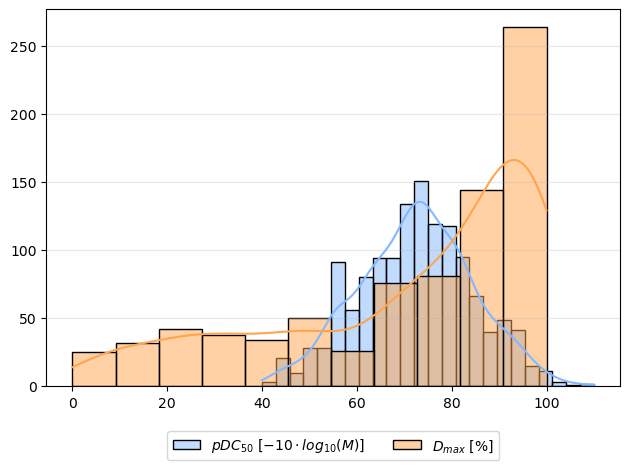

\begin{tabular}{lrrrr}
\toprule
E3 ligase &  E3 ligase (\%) &  Unique PROTACs (\% per E3) &  Unique targets (\% per E3) &  Unique cell lines (\% per E3) \\
\midrule
      VHL &            0.5 &                        0.4 &                        0.3 &                           0.3 \\
    Other &            0.1 &                        0.0 &                        0.0 &                           0.0 \\
     CRBN &            0.5 &                        0.5 &                        0.3 &                           0.3 \\
\bottomrule
\end{tabular}



,E3 ligase,E3 ligase (%),Unique PROTACs (% per E3),Unique targets (% per E3),Unique cell lines (% per E3)
0,VHL,0.487209,0.441536,0.338235,0.263736
1,Other,0.059302,0.000000,0.000000,0.000000
2,CRBN,0.453488,0.481675,0.264706,0.285714


E3 ligase                       VHLOtherCRBN
E3 ligase (%)                            1.0
Unique PROTACs (% per E3)           0.923211
Unique targets (% per E3)           0.602941
Unique cell lines (% per E3)        0.549451
dtype: object

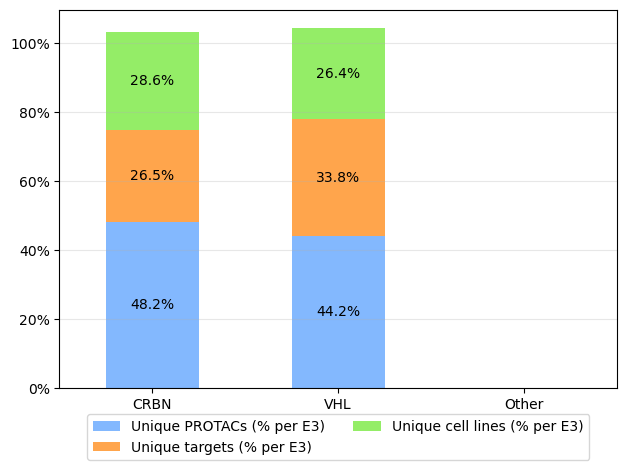

NOTE: The $$pDC_{50}$$ values are scaled by 10 to better show it next to the $$D_{max}$$ distribution.
NOTE: Some percentages do not "add up" because the same target might be "associated to"/"attacked by" multiple E3 ligases or tested in multiple cell lines.


In [64]:
active_col = 'Active (Dmax 0.6, pDC50 6.0)'

fig, ax = plt.subplots()

# sns.kdeplot(protac_df['pDC50'] * 10, ax=axes[ax_idx], color=palette[0], label='$pDC_{50}$ [$-10 \cdot log_{10}(M)$]', fill=True, alpha=0.5)
# sns.kdeplot(protac_df['Dmax (%)'], ax=axes[ax_idx], color=palette[1], label='$D_{max}$ [%]', fill=True, alpha=0.5)
sns.histplot(protac_df['pDC50'] * 10, color=palette[0], label='$pDC_{50}$ [$-10 \cdot log_{10}(M)$]', fill=True, alpha=0.5, kde=True, ax=ax)
sns.histplot(protac_df['Dmax (%)'], color=palette[1], label='$D_{max}$ [%]', fill=True, alpha=0.5, kde=True, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
# plt.legend(loc='upper left')
# Set legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('dc50_dmax_distributions.pdf', bbox_inches='tight')
plt.show()

# Create a new dataframe for which, for each E3 ligase name, we have:
# - the percentage of unique PROTACs associated to it
# - The percentage of unique POI associated to it
# - The percentage of unique cell lines associated to it
tmp = protac_df[protac_df[active_col].notna()].copy()
tmp['E3 ligase'] = tmp['E3 Ligase'].apply(lambda x: x if x == 'VHL' or x == 'CRBN' else 'Other')
e3_ligase_stats = pd.DataFrame()
e3_ligase_stats['E3 ligase'] = tmp['E3 ligase'].unique()

e3_ligase_stats['E3 ligase (%)'] = e3_ligase_stats['E3 ligase'].apply(
    lambda x: len(tmp[tmp['E3 ligase'] == x]) / len(tmp['E3 ligase'])
)

def get_unique_per_e3(df: pd.DataFrame, e3: str, column: str) -> pd.DataFrame:
    """ Get the unique number of entries per E3 ligase which are NOT in the other E3.

    Args:
        df(pd.DataFrame): The dataframe containing the data
        e3(str): The E3 ligase name
        column(str): The column name to count the unique entries
    Returns:
        pd.DataFrame: A dataframe containing the unique number of entries per E3 ligase
    """
    e3_df = df[df['E3 Ligase'] == e3]
    other_e3_df = df[df['E3 Ligase'] != e3]
    e3_unique = e3_df[~e3_df[column].isin(other_e3_df[column])][column].nunique()
    return e3_unique

e3_ligase_stats['Unique PROTACs (% per E3)'] = e3_ligase_stats['E3 ligase'].apply(
    # lambda x: 100 * tmp[tmp['E3 ligase'] == x]['Smiles'].nunique() / tmp['Smiles'].nunique()
    lambda x: get_unique_per_e3(tmp, x, 'Smiles') / tmp['Smiles'].nunique()
)
e3_ligase_stats['Unique targets (% per E3)'] = e3_ligase_stats['E3 ligase'].apply(
    # lambda x: tmp[tmp['E3 ligase'] == x]['Uniprot'].nunique() / tmp['Uniprot'].nunique()
    lambda x: get_unique_per_e3(tmp, x, 'Uniprot') / tmp['Uniprot'].nunique()
)
e3_ligase_stats['Unique cell lines (% per E3)'] = e3_ligase_stats['E3 ligase'].apply(
    # lambda x: tmp[tmp['E3 ligase'] == x]['Cell Line Identifier'].nunique() / tmp['Cell Line Identifier'].nunique()
    lambda x: get_unique_per_e3(tmp, x, 'Cell Line Identifier') / tmp['Cell Line Identifier'].nunique()
)


print(e3_ligase_stats.round(1).to_latex(index=False))
display(e3_ligase_stats)
display(e3_ligase_stats.sum(axis=0))

# Sort the e3_ligase_stats as: CRBN, VHL, Other
e3_ligase_stats = e3_ligase_stats.sort_values('E3 ligase', key=lambda x: x.map({'CRBN': 0, 'VHL': 1, 'Other': 2}))

fig, ax = plt.subplots()

# stacked Plot the distribution of PROTACs, POI and cell lines associated to each E3 ligase
e3_ligase_stats.plot.bar(
    x='E3 ligase',
    # y=['E3 ligase (%)', 'Unique PROTACs (% per E3)', 'Unique targets (% per E3)', 'Unique cell lines (% per E3)'],
    y=['Unique PROTACs (% per E3)', 'Unique targets (% per E3)', 'Unique cell lines (% per E3)'],
    stacked=True,
    ax=ax,
    color=adjusted_palette,
    grid=False,
)
ax.set_xlabel('')
ax.set_ylabel('')

# Set the y-axis to log scale
plt.grid(axis='y', alpha=0.3)
# Put the percentages on top of the bars if the bar corresponding to the E3 ligases 'VHL' and 'CRBN'
for i, p in enumerate(ax.patches):
    if p.get_height() < 0.20 and p.get_height() > 0:
        percentage = f'{p.get_height() * 100:.1f}%'
        if percentage == '0.0%':
            continue
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 + 0.08
        ax.annotate(percentage, (x, y), ha='center', va='center', color='black')
    else:
        percentage = f'{p.get_height() * 100:.1f}%'
        if percentage == '0.0%':
            continue
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), ha='center', va='center', color='black')

# Set the x-axis to percentage
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))

# Set x-axis labels to orientation 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Set the legend below the plot and outside the plot in 4 columns
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.tight_layout()
plt.savefig('e3_distributions.pdf', bbox_inches='tight')
plt.show()

print('NOTE: The $$pDC_{50}$$ values are scaled by 10 to better show it next to the $$D_{max}$$ distribution.')
print('NOTE: Some percentages do not "add up" because the same target might be "associated to"/"attacked by" multiple E3 ligases or tested in multiple cell lines.')

# Plotting CV Scores and Ablation Study Results

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys

def increase_saturation(hex_color, increase_by=0.3):
    # Convert hex to RGB
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    # Convert RGB to HSV
    hsv = colorsys.rgb_to_hsv(rgb[0]/255, rgb[1]/255, rgb[2]/255)
    # Increase saturation
    new_saturation = min(hsv[1] + increase_by, 1)  # Ensure saturation doesn't exceed 1
    # Convert back to RGB and then to hex
    new_rgb = colorsys.hsv_to_rgb(hsv[0], new_saturation, hsv[2])
    new_hex = '#' + ''.join(f'{int(c*255):02X}' for c in new_rgb)
    return new_hex

def darken_color(hex_color, darkening_factor=1.0):
    # Convert hex to RGB
    hex_color = hex_color.lstrip('#')
    rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    # Darken color
    new_rgb = [(color * darkening_factor) for color in rgb]

    # Convert RGB back to hex
    new_hex = '#' + ''.join(f'{int(c):02X}' for c in new_rgb)
    return new_hex

palette = [
    '#D0E4FE', # blue
    '#FFCC99', # orange
    '#C4EDAF', # green
    '#FFCCFF', # pink
]


# Adjusted palette
palette = adjusted_palette = [increase_saturation(color) for color in palette]
print(adjusted_palette)

['#83B8FE', '#FFA54C', '#94ED67', '#FF7FFF']


In [64]:
cols_to_show = [
    # 'val_active_perc',
    # 'val_inactive_perc',
    'dummy_val_acc',
    'val_acc',
    'val_roc_auc',
    # 'test_active_perc',
    # 'test_inactive_perc',
    'dummy_test_acc',
    'test_acc',
    'test_roc_auc',
]

report = pd.read_csv('../reports/cv_report_hparam_search_5-splits_Active_Dmax_0.6_pDC50_6.0_test_split_0.1.csv')
report_tanimoto = pd.read_csv('../reports/cv_report_hparam_search_5-splits_Active_Dmax_0.6_pDC50_6.0_test_split_0.1_tanimoto.csv')
report = pd.concat([report, report_tanimoto])

# report = pd.read_csv('../reports/cv_report_hparam_search_5-splits_Active_Dmax_0.6_pDC50_6.0_test_split_0.2.csv')
report.columns = [c.replace('split_type', 'group_type') for c in report.columns]

display(report)

# Remove group_type e3_ligase
report = report[report['group_type'] != 'e3_ligase']

report['dummy_val_acc'] = report[['val_active_perc', 'val_inactive_perc']].max(axis=1)
report['dummy_test_acc'] = report[['test_active_perc', 'test_inactive_perc']].max(axis=1)

tmp = report[report['disabled_embeddings'].isna()]
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# tmp.groupby(['group_type', 'active']).mean().round(3)[cols_to_show]
tmp.groupby(['group_type',]).mean().round(3)[cols_to_show]

,fold,group_type,train_len,val_len,train_perc,val_perc,train_active_perc,train_inactive_perc,val_active_perc,val_inactive_perc,...,hparam_batch_size,hparam_learning_rate,hparam_join_embeddings,hparam_smote_k_neighbors,hparam_use_smote,hparam_apply_scaling,hparam_dropout,disabled_embeddings,train_unique_groups,val_unique_groups
0,0,random,616,155,0.798962,0.201038,0.514610,0.485390,0.516129,0.483871,...,32,0.000056,concat,6,True,True,0.119461,NaN,NaN,NaN
1,0,random,616,155,0.798962,0.201038,0.514610,0.485390,0.516129,0.483871,...,32,0.000056,concat,6,True,True,0.119461,disabled poi,NaN,NaN
2,0,random,616,155,0.798962,0.201038,0.514610,0.485390,0.516129,0.483871,...,32,0.000056,concat,6,True,True,0.119461,disabled cell,NaN,NaN
3,0,random,616,155,0.798962,0.201038,0.514610,0.485390,0.516129,0.483871,...,32,0.000056,concat,6,True,True,0.119461,disabled smiles,NaN,NaN
4,0,random,616,155,0.798962,0.201038,0.514610,0.485390,0.516129,0.483871,...,32,0.000056,concat,6,True,True,0.119461,disabled e3 cell,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,4,tanimoto,661,111,0.856218,0.143782,0.521936,0.478064,0.468468,0.531532,...,16,0.000019,beginning,5,False,True,0.217163,disabled poi,47.0,8.0
31,4,tanimoto,661,111,0.856218,0.143782,0.521936,0.478064,0.468468,0.531532,...,16,0.000019,beginning,5,False,True,0.217163,disabled cell,47.0,8.0
32,4,tanimoto,661,111,0.856218,0.143782,0.521936,0.478064,0.468468,0.531532,...,16,0.000019,beginning,5,False,True,0.217163,disabled smiles,47.0,8.0
33,4,tanimoto,661,111,0.856218,0.143782,0.521936,0.478064,0.468468,0.531532,...,16,0.000019,beginning,5,False,True,0.217163,disabled e3 cell,47.0,8.0


,dummy_val_acc,val_acc,val_roc_auc,dummy_test_acc,test_acc,test_roc_auc
group_type,,,,,,
random,0.515,0.846,0.905,0.535,0.714,0.779
tanimoto,0.555,0.775,0.852,0.529,0.715,0.840
uniprot,0.580,0.628,0.654,0.541,0.584,0.592


In [65]:
def is_active(DC50: float, Dmax: float, oring=False, pDC50_threshold=7.0, Dmax_threshold=0.8) -> bool:
    """ Check if a PROTAC is active based on DC50 and Dmax.	
    Args:
        DC50(float): DC50 in nM
        Dmax(float): Dmax in %
    Returns:
        bool: True if active, False if inactive, np.nan if either DC50 or Dmax is NaN
    """
    pDC50 = -np.log10(DC50 * 1e-9) if pd.notnull(DC50) else np.nan
    Dmax = Dmax / 100
    if pd.notnull(pDC50):
        if pDC50 < pDC50_threshold:
            return False
    if pd.notnull(Dmax):
        if Dmax < Dmax_threshold:
            return False
    if oring:
        if pd.notnull(pDC50):
            return True if pDC50 >= pDC50_threshold else False
        elif pd.notnull(Dmax):
            return True if Dmax >= Dmax_threshold else False
        else:
            return np.nan
    else:
        if pd.notnull(pDC50) and pd.notnull(Dmax):
            return True if pDC50 >= pDC50_threshold and Dmax >= Dmax_threshold else False
        else:
            return np.nan


active_col = 'Active (Dmax 0.6, pDC50 6.0)'
pDC50_threshold = 6.0
Dmax_threshold = 0.6
protac_df[active_col] = protac_df.apply(
    lambda x: is_active(x['DC50 (nM)'], x['Dmax (%)'], pDC50_threshold=pDC50_threshold, Dmax_threshold=Dmax_threshold), axis=1
)
tot_len = len(protac_df.dropna(subset=active_col))
tot_len

857

In [53]:
tmp = protac_df.dropna(subset=active_col)
print(f'Number of active PROTACs: {len(tmp[tmp[active_col] == True])} ({100 * len(tmp[tmp[active_col] == True]) / len(tmp):.2f}%)')
print(f'Number of inactive PROTACs: {len(tmp[tmp[active_col] == False])} ({100 * len(tmp[tmp[active_col] == False]) / len(tmp):.2f}%)')
tmp[active_col].value_counts()

Number of active PROTACs: 437 (50.99%)
Number of inactive PROTACs: 420 (49.01%)


True     437
False    420
Name: Active (Dmax 0.6, pDC50 6.0), dtype: int64

In [54]:
print(len(protac_df))
print(len(protac_df.dropna(subset='Dmax (%)')), len(protac_df.dropna(subset='Dmax (%)')) / len(protac_df))
print(len(protac_df.dropna(subset='DC50 (nM)')), len(protac_df.dropna(subset='DC50 (nM)')) / len(protac_df))

2141
812 0.3792620270901448
1350 0.6305464736104625


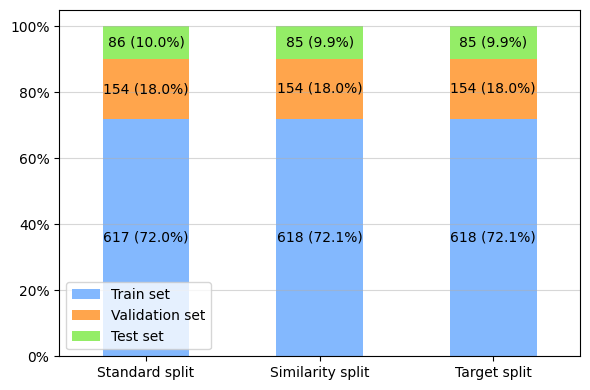

In [66]:
import matplotlib.ticker as mtick

# Display train and test set informations
cols_to_show = [
    'fold',
    'group_type',
    'train_len',
    'train_perc',
    'val_len',
    'val_perc',
    'test_len',
    'test_perc',
    'train_active_perc',
    'val_active_perc',
    'test_active_perc',
    'train_leaking_uniprot_perc',
    'train_leaking_smiles_perc',
    # 'train_unique_groups',
    # 'val_unique_groups',
]
report['test_len'] = tot_len - report['train_len'] - report['val_len']
report['train_perc'] = report['train_len'] / tot_len
report['val_perc'] = report['val_len'] / tot_len
report['test_perc'] = report['test_len'] / tot_len

tmp = report[report['group_type'] != 'e3_ligase'].groupby('group_type').mean().round(3).copy()
# tmp = report[cols_to_show].groupby('group_type').mean().round(3).copy()

# "Collapse" group_type into another column along side the others
tmp = tmp.reset_index()
# Display the columns with '_perc' in their name as percentages
for c in tmp.columns:
    if '_perc' in c:
        tmp[c] *= 100
# Plot a stacked barplot of the train/val/test percentages
# fig, ax = plt.subplots() #figsize=(8, 6))
fig, ax = plt.subplots(figsize=(6, 4))

tmp.plot.bar(x='group_type', y=['train_perc', 'val_perc', 'test_perc'], stacked=True, ax=ax, color=palette, grid=False)
ax.set_xlabel('')
# ax.set_xlabel('Split Type')
# ax.set_ylabel('Percentage')
# ax.set_title('Train/Validation/Test Split')

# Write the train/val/test len inside the stacked bars
for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{round(height / 100 * tot_len)} ({height/100:.1%})', ha='center', va='center')

# Rename the legend labels
ax.legend(['Train set', 'Validation set', 'Test set'])
# Rename x-axis labels
ax.set_xticklabels(['Standard split', 'Similarity split', 'Target split'])
# Set x ticks to 90 degree orientation
plt.xticks(rotation=0)

plt.grid(axis='y', alpha=0.5)

# Set the y-axis labels to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()
plt.savefig('train_val_test_split.pdf', bbox_inches='tight')
plt.show()

In [56]:
report.columns

Index(['fold', 'group_type', 'train_len', 'val_len', 'train_perc', 'val_perc',
       'train_active_perc', 'train_inactive_perc', 'val_active_perc',
       'val_inactive_perc', 'test_active_perc', 'test_inactive_perc',
       'num_leaking_uniprot', 'num_leaking_smiles',
       'train_leaking_uniprot_perc', 'train_leaking_smiles_perc', 'val_loss',
       'val_acc', 'val_f1_score', 'val_hp_metric', 'val_opt_score',
       'val_precision', 'val_recall', 'val_roc_auc', 'test_loss', 'test_acc',
       'test_f1_score', 'test_hp_metric', 'test_opt_score', 'test_precision',
       'test_recall', 'test_roc_auc', 'hparam_hidden_dim', 'hparam_batch_size',
       'hparam_learning_rate', 'hparam_join_embeddings',
       'hparam_smote_k_neighbors', 'hparam_use_smote', 'hparam_apply_scaling',
       'hparam_dropout', 'disabled_embeddings', 'train_unique_groups',
       'val_unique_groups', 'dummy_val_acc', 'dummy_test_acc', 'test_len',
       'test_perc'],
      dtype='object')

add dummy score bar, but the description of it can go in the text only, not in the legend

replace uniprot-wise to target-wise

remove the title, it's redundant because it goes into the caption

\begin{tabular}{llr}
\toprule
       CV-Groups &        Metric &  Score \\
\midrule
     Dummy model & Test Accuracy &  0.535 \\
     Dummy model &  Test ROC AUC &  0.500 \\
     Dummy model &  Val Accuracy &  0.516 \\
     Dummy model &   Val ROC AUC &  0.500 \\
Similarity split & Test Accuracy &  0.715 \\
Similarity split &  Test ROC AUC &  0.840 \\
Similarity split &  Val Accuracy &  0.775 \\
Similarity split &   Val ROC AUC &  0.852 \\
  Standard split & Test Accuracy &  0.714 \\
  Standard split &  Test ROC AUC &  0.779 \\
  Standard split &  Val Accuracy &  0.846 \\
  Standard split &   Val ROC AUC &  0.905 \\
    Target split & Test Accuracy &  0.584 \\
    Target split &  Test ROC AUC &  0.592 \\
    Target split &  Val Accuracy &  0.628 \\
    Target split &   Val ROC AUC &  0.654 \\
\bottomrule
\end{tabular}



,CV-Groups,Metric,Score
0,Dummy model,Test Accuracy,0.535
1,Dummy model,Test ROC AUC,0.500
2,Dummy model,Val Accuracy,0.516
3,Dummy model,Val ROC AUC,0.500
4,Similarity split,Test Accuracy,0.715
5,Similarity split,Test ROC AUC,0.840
6,Similarity split,Val Accuracy,0.775
7,Similarity split,Val ROC AUC,0.852
8,Standard split,Test Accuracy,0.714
9,Standard split,Test ROC AUC,0.779


\begin{tabular}{rllr}
\toprule
 Fold &        CV-Groups &        Metric &    Score \\
\midrule
  0.0 &   Standard split &  Val Accuracy & 0.838710 \\
  1.0 &   Standard split &  Val Accuracy & 0.824675 \\
  2.0 &   Standard split &  Val Accuracy & 0.850649 \\
  3.0 &   Standard split &  Val Accuracy & 0.857143 \\
  4.0 &   Standard split &  Val Accuracy & 0.857143 \\
  0.0 &     Target split &  Val Accuracy & 0.646226 \\
  1.0 &     Target split &  Val Accuracy & 0.882759 \\
  2.0 &     Target split &  Val Accuracy & 0.554545 \\
  3.0 &     Target split &  Val Accuracy & 0.561947 \\
  4.0 &     Target split &  Val Accuracy & 0.493671 \\
  0.0 & Similarity split &  Val Accuracy & 0.760000 \\
  1.0 & Similarity split &  Val Accuracy & 0.767857 \\
  2.0 & Similarity split &  Val Accuracy & 0.765306 \\
  3.0 & Similarity split &  Val Accuracy & 0.732955 \\
  4.0 & Similarity split &  Val Accuracy & 0.846847 \\
  0.0 &   Standard split &   Val ROC AUC & 0.903500 \\
  1.0 &   Standard split 

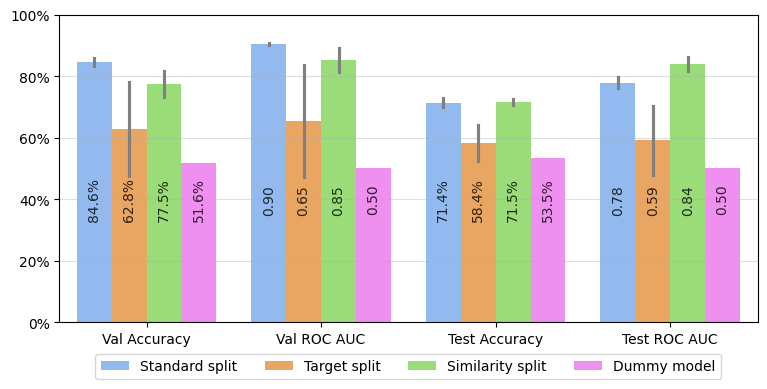

In [91]:
# sns.set_style("whitegrid")


def plot_report(report_df, title=None):
    n_splits = 5
    tmp = report_df.copy()[[
        'fold', 'group_type',
        'val_acc', 'val_roc_auc', # 'val_precision', 'val_recall', 'val_f1_score',
        'test_acc', 'test_roc_auc', # 'test_precision', 'test_recall', 'test_f1_score',
    ]]
    # Rename columns
    tmp.columns = [
        'Fold', 'CV-Groups',
        'Val Accuracy', 'Val ROC AUC', # 'Val Precision', 'Val Recall', 'Val F1 score',
        'Test Accuracy', 'Test ROC AUC', # 'Test Precision', 'Test Recall', 'Test F1 score',
    ]
    # Remove all entries with 'CV-Groups' == 'e3_ligase'
    tmp = tmp[tmp['CV-Groups'] != 'e3_ligase']
    # Plot aggregated mean value of all metrics in one bar plot
    tmp = tmp.melt(id_vars=['Fold', 'CV-Groups'], var_name='Metric', value_name='Score')
    # Rename elements in 'CV-Groups' column
    group2name = {
        'random': 'Standard split',
        'uniprot': 'Target split',
        'tanimoto': 'Similarity split',
    }

    tmp['CV-Groups'] = tmp['CV-Groups'].map(group2name)
    # Draw one horizontal line for each CV-group representing the max value of inactive PROTACs percentage across the folds
    dummy_val_acc = 0
    dummy_test_acc = 0
    for i, group in enumerate(group2name.keys()):
        # Get the majority class in group_df
        group_df = report_df[report_df['group_type'] == group]
        
        major_col = 'inactive' if group_df['val_inactive_perc'].mean() > 0.5 else 'active'
        dummy_val_acc += group_df[f'val_{major_col}_perc'].mean()

        major_col = 'inactive' if group_df['test_inactive_perc'].mean() > 0.5 else 'active'
        dummy_test_acc += group_df[f'test_{major_col}_perc'].mean()

    #     # plt.axhline(group_df[f'val_{major_col}_perc'].max(), color=f'C{i}', linestyle='-.', label=f'Max val {major_col} (%) for {group2name[group]}')
    #     plt.axhline(group_df[f'val_{major_col}_perc'].mean(), color=f'C{i}', linestyle='--', label=f'Mean val {major_col} (%) for {group2name[group].split(" (")[0]}')
    # plt.axhline(report_df[f'test_{major_col}_perc'].max(), color='black', linestyle=':', label=f'Max test {major_col} (%)')
    
    dummy_val_acc /= len(group2name)
    dummy_test_acc /= len(group2name)

    # create a dummy model dataframe:
    # The "Metric" column shall have: 'Val Accuracy', 'Val ROC AUC', 'Test Accuracy', 'Test ROC AUC'
    # The "CV-Groups" column shall have: 'Dummy model'
    # The "Score" column shall have the following values:
    # its val and test ROC AUC is 0.5,
    # its val accuracy is the max value of val_active_perc and val_inactive_perc per group,
    # and its test accuracy is the max value of test_active_perc and test_inactive_perc per group.
    # The "Fold" column shall have the same value for all rows, e.g. 0
    dummy_model = pd.DataFrame({
        'Metric': ['Val Accuracy', 'Val ROC AUC', 'Test Accuracy', 'Test ROC AUC'],
        'CV-Groups': 'Dummy model',
        'Score': [
            dummy_val_acc,
            0.5,
            dummy_test_acc,
            0.5,
        ],
    })

    # Append the dummy model dataframe to the tmp dataframe
    tmp = pd.concat([tmp, dummy_model])

    summary_df = tmp.groupby(['CV-Groups', 'Metric']).mean().round(3).reset_index().drop('Fold', axis=1)
    # Print summary_df to Latex
    print(summary_df.to_latex(index=False))
    display(summary_df)

    # Setup the plot size
    # plt.figure(figsize=(8, 4)) # Original
    plt.figure(figsize=(8, 4))
    
    # Plot the bar plot
    sns.barplot(data=tmp,
        x='Metric',
        y='Score',
        hue='CV-Groups',
        errorbar=('sd', 1),
        # Lighten the color of the error bars
        errcolor='0.5',
        palette=sns.color_palette(adjusted_palette, len(adjusted_palette)),
    )

    print(tmp.to_latex(index=False))

    if title is not None:
        plt.title(title)

    plt.grid(axis='y', alpha=0.4)
    # Set y-axis to end at 1.0
    plt.ylim(0, 1.0)
    # Make the y-axis as percentage
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    # Plot the legend below the x-axis, outside the plot, and divided in two columns
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4)

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        # TODO: For some reasons, there are 4 additional rectangles being
        # plotted... I suspect it's because the dummy_df doesn't have the same
        # shape as the df containing all the evaluation data...
        if p.get_height() < 0.01:
            continue
        if i % 2 == 0:
            value = '{:.1f}%'.format(100 * p.get_height())
        else:
            value = '{:.2f}'.format(p.get_height())
        
        print(f'Plotting value: {p.get_height()} -> {value}')
        x = p.get_x() + p.get_width() / 2
        y = 0.4 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.tight_layout()
    # Remove axis labels
    plt.xlabel('')
    plt.ylabel('')
    plt.savefig('genlife_poster_performance.pdf', bbox_inches='tight')
    plt.savefig('stefano_performance_plot.pdf', bbox_inches='tight')
    plt.show()

tmp = report[report['disabled_embeddings'].isna()]
plot_report(tmp)

In [46]:
report['disabled_embeddings'].unique()

array([nan, 'disabled poi', 'disabled cell', 'disabled smiles',
       'disabled e3 cell', 'disabled poi e3 cell', 'disabled e3'],
      dtype=object)

Ablation study:

- one single embedding/branch active at the time
- just the cell and no other embeddings -> hopefully the performance is bad
- just the SMILES branch and no other embeddings

**TODO**: Ordinal encoding for the cell line

In [64]:
report['disabled_embeddings'].unique()

array([nan, 'disabled poi', 'disabled cell', 'disabled smiles',
       'disabled e3 cell', 'disabled poi e3 cell', 'disabled e3'],
      dtype=object)

\begin{tabular}{lllr}
\toprule
{} &                                disabled\_embeddings &               metric &  score \\
\midrule
0  &                             All embeddings enabled &        Test Accuracy &  0.714 \\
1  &                             All embeddings enabled &  Validation Accuracy &  0.846 \\
2  &                            Disabled E3 information &        Test Accuracy &  0.700 \\
3  &                            Disabled E3 information &  Validation Accuracy &  0.786 \\
4  &                          Disabled cell information &        Test Accuracy &  0.670 \\
5  &                          Disabled cell information &  Validation Accuracy &  0.776 \\
6  &  Disabled cell, E3, and target info\textbackslash n(only comp... &        Test Accuracy &  0.647 \\
7  &  Disabled cell, E3, and target info\textbackslash n(only comp... &  Validation Accuracy &  0.730 \\
8  &                      Disabled compound information &        Test Accuracy &  0.663 \\
9  &                 

/tmp/ipykernel_2670585/1353845451.py:85: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=final_df,


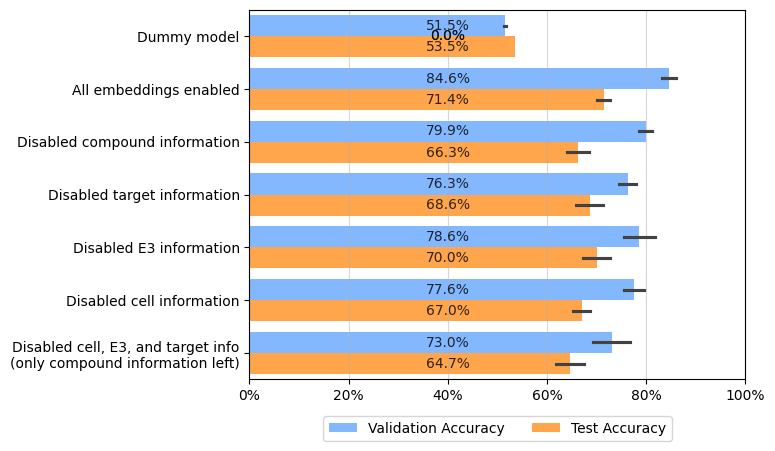

\begin{tabular}{lllr}
\toprule
{} &                                disabled\_embeddings &               metric &  score \\
\midrule
0  &                             All embeddings enabled &        Test Accuracy &  0.478 \\
1  &                             All embeddings enabled &  Validation Accuracy &  0.806 \\
2  &                            Disabled E3 information &        Test Accuracy &  0.506 \\
3  &                            Disabled E3 information &  Validation Accuracy &  0.784 \\
4  &                          Disabled cell information &        Test Accuracy &  0.396 \\
5  &                          Disabled cell information &  Validation Accuracy &  0.753 \\
6  &  Disabled cell, E3, and target info\textbackslash n(only comp... &        Test Accuracy &  0.439 \\
7  &  Disabled cell, E3, and target info\textbackslash n(only comp... &  Validation Accuracy &  0.700 \\
8  &                      Disabled compound information &        Test Accuracy &  0.580 \\
9  &                 

/tmp/ipykernel_2670585/1353845451.py:85: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=final_df,


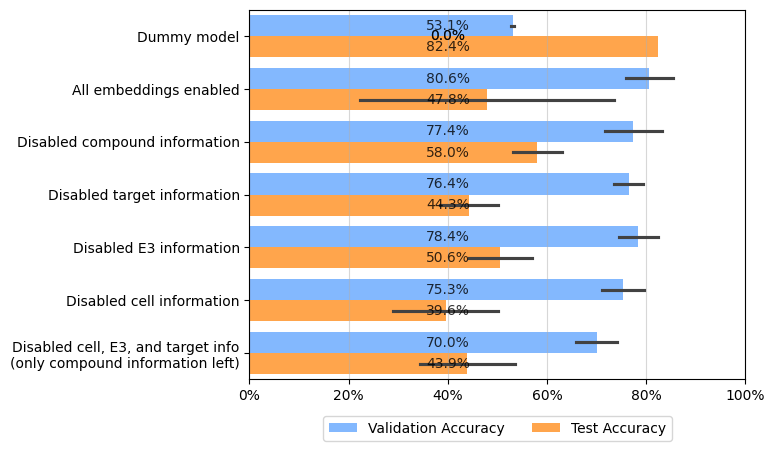

\begin{tabular}{lllr}
\toprule
{} &                                disabled\_embeddings &               metric &  score \\
\midrule
0  &                             All embeddings enabled &        Test Accuracy &  0.584 \\
1  &                             All embeddings enabled &  Validation Accuracy &  0.628 \\
2  &                            Disabled E3 information &        Test Accuracy &  0.508 \\
3  &                            Disabled E3 information &  Validation Accuracy &  0.598 \\
4  &                          Disabled cell information &        Test Accuracy &  0.489 \\
5  &                          Disabled cell information &  Validation Accuracy &  0.580 \\
6  &  Disabled cell, E3, and target info\textbackslash n(only comp... &        Test Accuracy &  0.501 \\
7  &  Disabled cell, E3, and target info\textbackslash n(only comp... &  Validation Accuracy &  0.507 \\
8  &                      Disabled compound information &        Test Accuracy &  0.600 \\
9  &                 

/tmp/ipykernel_2670585/1353845451.py:85: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=final_df,


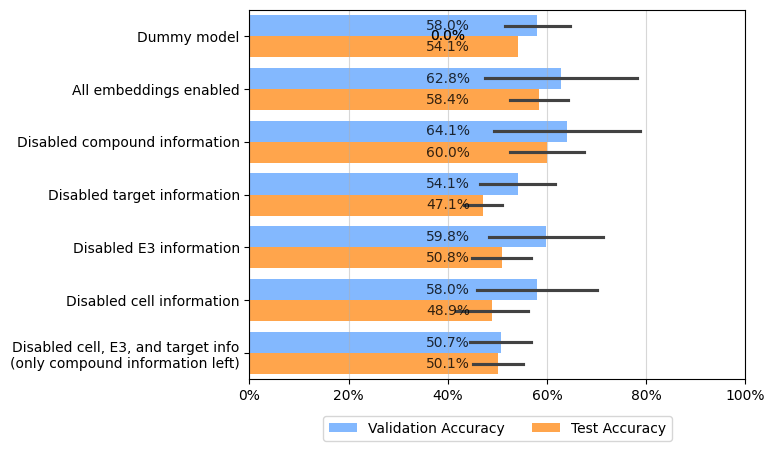

\begin{tabular}{lllr}
\toprule
{} &                                disabled\_embeddings &               metric &  score \\
\midrule
0  &                             All embeddings enabled &        Test Accuracy &  0.715 \\
1  &                             All embeddings enabled &  Validation Accuracy &  0.775 \\
2  &                            Disabled E3 information &        Test Accuracy &  0.666 \\
3  &                            Disabled E3 information &  Validation Accuracy &  0.750 \\
4  &                          Disabled cell information &        Test Accuracy &  0.687 \\
5  &                          Disabled cell information &  Validation Accuracy &  0.704 \\
6  &  Disabled cell, E3, and target info\textbackslash n(only comp... &        Test Accuracy &  0.614 \\
7  &  Disabled cell, E3, and target info\textbackslash n(only comp... &  Validation Accuracy &  0.618 \\
8  &                      Disabled compound information &        Test Accuracy &  0.706 \\
9  &                 

/tmp/ipykernel_2670585/1353845451.py:85: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(data=final_df,


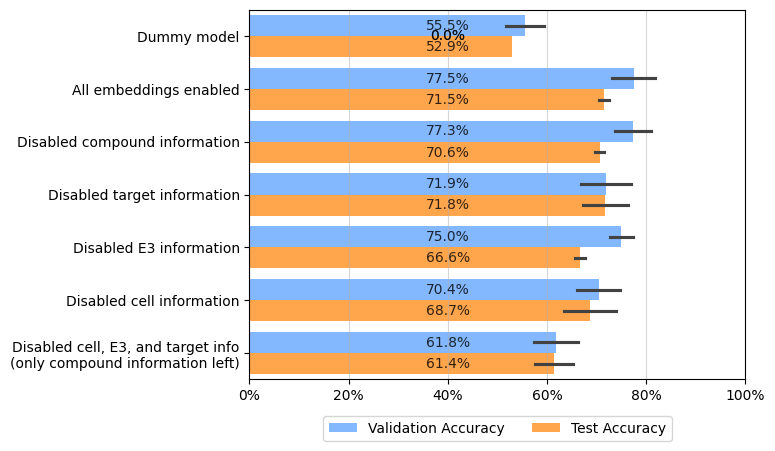

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ablation_study_combinations = [
    'disabled smiles',
    'disabled poi',
    'disabled e3',
    'disabled cell',
    'disabled poi e3 smiles',
    'disabled poi e3 cell',
]

for group in report['group_type'].unique():    
    baseline = report[report['disabled_embeddings'].isna()].copy()
    baseline = baseline[baseline['group_type'] == group]
    baseline['disabled_embeddings'] = 'all embeddings enabled'
    metrics_to_show = ['val_acc', 'test_acc']
    baseline = baseline.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')

    ablation_dfs = []
    for disabled_embeddings in ablation_study_combinations:
        if pd.isnull(disabled_embeddings):
            continue
        tmp = report[report['disabled_embeddings'] == disabled_embeddings].copy()
        tmp = tmp[tmp['group_type'] == group]
        tmp = tmp.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
        ablation_dfs.append(tmp)
    ablation_df = pd.concat(ablation_dfs)

    dummy_val_df = pd.DataFrame()
    tmp = report[report['group_type'] == group]
    dummy_val_df['score'] = tmp[['val_active_perc', 'val_inactive_perc']].max(axis=1)
    dummy_val_df['metric'] = metrics_to_show[0]
    dummy_val_df['disabled_embeddings'] = 'dummy'

    dummy_test_df = pd.DataFrame()
    dummy_test_df['score'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
    dummy_test_df['metric'] = metrics_to_show[1]
    dummy_test_df['disabled_embeddings'] = 'dummy'

    dummy_df = pd.concat([dummy_val_df, dummy_test_df])

    final_df = pd.concat([dummy_df, baseline, ablation_df])

    final_df['metric'] = final_df['metric'].map({
        'val_acc': 'Validation Accuracy',
        'test_acc': 'Test Accuracy',
        'val_roc_auc': 'Val ROC-AUC',
        'test_roc_auc': 'Test ROC-AUC',
    })

    

    # final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
    #     'all embeddings enabled': 'All embeddings',
    #     'dummy': 'Dummy model',
    #     'disabled smiles': 'E3, Cell, Target',
    #     'disabled poi e3 smiles': 'Cell only',
    #     'disabled poi e3 cell': 'SMILES only',
    #     'disabled poi': 'SMILES, E3, Cell',
    #     'disabled e3': 'SMILES, Cell, Target',
    #     'disabled cell': 'SMILES, E3, Target',
    # })
    final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
        'all embeddings enabled': 'All embeddings enabled',
        'dummy': 'Dummy model',
        'disabled smiles': 'Disabled compound information',
        'disabled e3': 'Disabled E3 information',
        'disabled poi': 'Disabled target information',
        'disabled cell': 'Disabled cell information',
        'disabled poi e3 smiles': 'Disabled compound, E3, and target info\n(only cell information left)',
        'disabled poi e3 cell': 'Disabled cell, E3, and target info\n(only compound information left)',
    })

    # Print final_df to latex
    tmp  = final_df.groupby(['disabled_embeddings', 'metric']).mean().round(3)
    # Remove fold column to tmp
    tmp = tmp.reset_index().drop('fold', axis=1)
    print(tmp.to_latex())

    # fig, ax = plt.subplots(figsize=(5, 5))
    fig, ax = plt.subplots()

    sns.barplot(data=final_df,
        y='disabled_embeddings',
        x='score',
        hue='metric',
        ax=ax,
        errorbar=('sd', 1),
        palette=sns.color_palette(adjusted_palette, len(adjusted_palette)),
        saturation=1,
    )

    # ax.set_title(f'{group.replace("random", "standard")} CV split')
    ax.grid(axis='x', alpha=0.5)
    ax.tick_params(axis='y', rotation=0)
    ax.set_xlim(0, 1.0)
    ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    ax.set_ylabel('')
    ax.set_xlabel('')
    # Set the legend outside the plot and below
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        value = '{:.1f}%'.format(100 * p.get_width())
        y = p.get_y() + p.get_height() / 2
        x = 0.4 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, alpha=0.8)

    plt.savefig(f'ablation_study_{group}.pdf', bbox_inches='tight')
    plt.show()

In [110]:
# [c for c in report.columns if 'hparam' in c]
# display(report[report['hparam_apply_scaling']].groupby(['fold', 'group_type'])[['val_acc', 'test_acc']].mean().round(3))
# display(report[~report['hparam_apply_scaling']].groupby(['fold', 'group_type'])[['val_acc', 'test_acc']].mean().round(3))

# Count the number of times the scaling was applied and its percentage
scaling_counts = report['hparam_apply_scaling'].value_counts()
scaling_counts = scaling_counts / scaling_counts.sum()
print(f'Number of times the scaling was applied:     {scaling_counts[True]:.1%}')
print(f'Number of times the scaling was not applied: {scaling_counts[False]:.1%}')

# Count the number and percentage of occurance of the join_embeddings column
join_embeddings_counts = report['hparam_join_embeddings'].value_counts()
join_embeddings_counts = join_embeddings_counts / join_embeddings_counts.sum()
join_embeddings_counts
# print(f'Number of times the embeddings were joined: {join_embeddings_counts[True]:.1%}')
# print(f'Number of times the embeddings were not joined: {join_embeddings_counts[False]:.1%}')


# For each hparam, print some relevant statistics
hparam_cols = [c for c in report.columns if 'hparam' in c]
for hparam in hparam_cols:
    print(f'{hparam}:')
    print(report[hparam].value_counts() // 6)
    print()

Number of times the scaling was applied:     95.0%
Number of times the scaling was not applied: 5.0%
hparam_hidden_dim:
512    9
256    6
768    5
Name: hparam_hidden_dim, dtype: int64

hparam_batch_size:
32    10
16     6
8      4
Name: hparam_batch_size, dtype: int64

hparam_learning_rate:
0.000056    1
0.000037    1
0.000014    1
0.000025    1
0.000010    1
0.000015    1
0.000014    1
0.000012    1
0.000012    1
0.000029    1
0.000454    1
0.000049    1
0.000013    1
0.000014    1
0.000013    1
0.000020    1
0.000029    1
0.000019    1
0.000024    1
0.000014    1
Name: hparam_learning_rate, dtype: int64

hparam_join_embeddings:
sum          9
beginning    7
concat       4
Name: hparam_join_embeddings, dtype: int64

hparam_smote_k_neighbors:
6     4
3     4
14    4
5     3
10    2
9     1
7     1
8     1
Name: hparam_smote_k_neighbors, dtype: int64

hparam_use_smote:
True     10
False    10
Name: hparam_use_smote, dtype: int64

hparam_apply_scaling:
True     19
False     1
Name: hpar

../reports/study_Active_Dmax_0.6_pDC50_6.0_random_fold_0_test_split_0.2.pkl
{'hidden_dim': 512, 'batch_size': 16, 'learning_rate': 1.7221700002340547e-05, 'join_embeddings': 'sum', 'smote_k_neighbors': 14, 'use_smote': False, 'apply_scaling': True, 'dropout': 0.15240823317125454}
OrderedDict([('learning_rate', 0.42893372832121324), ('smote_k_neighbors', 0.30085702206051634), ('join_embeddings', 0.0975632989422997), ('batch_size', 0.05369329248321026), ('dropout', 0.05078700222041663), ('hidden_dim', 0.03849912063219203), ('use_smote', 0.01543507014670634), ('apply_scaling', 0.014231465193445552)])


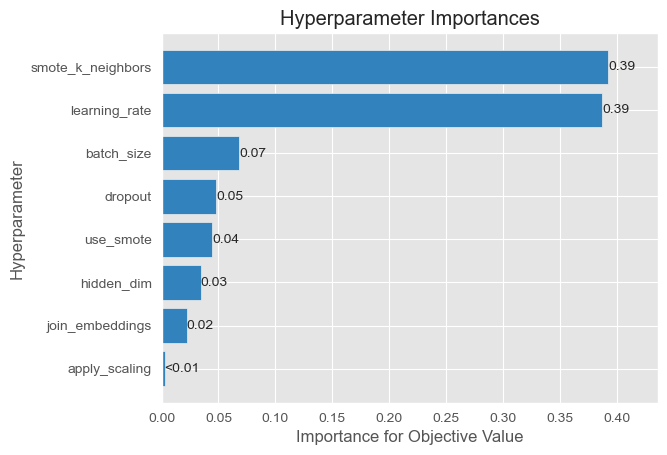

In [87]:
import joblib
import optuna

active_col = 'Active (Dmax 0.6, pDC50 6.0)'
active_name = active_col.replace(' ', '_').replace('(', '').replace(')', '').replace(',', '')
test_split = 0.2
cv_n_splits = 5

for split_type in report.group_type.unique():
    for k in range(cv_n_splits):
        study_filename = f'../reports/study_{active_name}_{split_type}_fold_{k}_test_split_{test_split}.pkl'
        study = joblib.load(study_filename)
        print(f'{study_filename}')
        print(f'{study.best_params}')
        print(optuna.importance.get_param_importances(study))
        ax = optuna.visualization.matplotlib.plot_param_importances(study)
        plt.show()
        break
    break

### Older Code

KeyError: 'active'

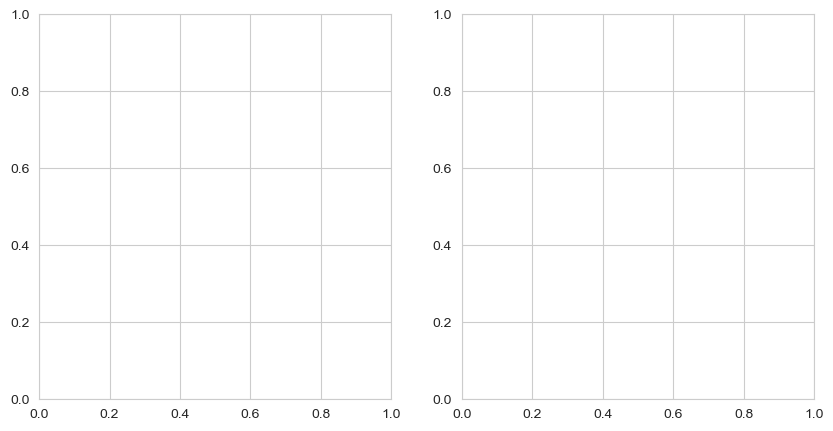

In [50]:
# Make two plots side by side, one for active - or, one for active - and.
# On the y-axis put the val and test accuracy (different hue).
# On the x-axis put the baseline (all embeddings on) with all the disabled embeddings combinations next.

ablation_study_combinations = [
    'disabled smiles',
    'disabled poi',
    'disabled e3',
    'disabled cell',
    'disabled poi e3 smiles',
    'disabled poi e3 cell',
]

for group in report['group_type'].unique():
    # Set the two plots side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    for i, active_def in enumerate(['and', 'or']):
        baseline = report[report['disabled_embeddings'].isna()].copy()
        baseline = baseline[baseline['group_type'] == group]
        baseline = baseline[baseline['active'] == active_def]
        baseline['disabled_embeddings'] = 'all embeddings enabled'
        # Melt accross folds and get acc and roc_auc
        metrics_to_show = ['val_acc', 'test_acc']
        # metrics_to_show = ['val_roc_auc', 'test_roc_auc']

        baseline = baseline.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')

        ablation_dfs = []
        for disabled_embeddings in ablation_study_combinations:
            if pd.isnull(disabled_embeddings):
                continue
            tmp = report[report['disabled_embeddings'] == disabled_embeddings].copy()
            tmp = tmp[tmp['group_type'] == group]
            tmp = tmp[tmp['active'] == active_def]
            # Melt accross folds and get acc and roc_auc
            tmp = tmp.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
            ablation_dfs.append(tmp)
        ablation_df = pd.concat(ablation_dfs)

        # Create a dummy df with the same structure as the baseline df
        # Score is the max between the val_active_perc and val_inactive_perc
        dummy_val_df = pd.DataFrame()
        tmp = report[report['group_type'] == group]
        tmp = tmp[tmp['active'] == active_def]
        dummy_val_df['score'] = tmp[['val_active_perc', 'val_inactive_perc']].max(axis=1)
        # dummy_val_df['score'] = 0.5
        dummy_val_df['metric'] = metrics_to_show[0]
        dummy_val_df['disabled_embeddings'] = 'dummy'

        dummy_test_df = pd.DataFrame()
        dummy_test_df['score'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
        # dummy_test_df['score'] = 0.5
        dummy_test_df['metric'] = metrics_to_show[1]
        dummy_test_df['disabled_embeddings'] = 'dummy'

        dummy_df = pd.concat([dummy_val_df, dummy_test_df])

        final_df = pd.concat([dummy_df, baseline, ablation_df])

        # Rename 'val_acc' to 'Val Accuracy' and 'test_acc' to 'Test Accuracy'
        final_df['metric'] = final_df['metric'].map({
            'val_acc': 'Val Accuracy',
            'test_acc': 'Test Accuracy',
            'val_roc_auc': 'Val ROC-AUC',
            'test_roc_auc': 'Test ROC-AUC',
        })
        # Map 'all embeddings enabled' to 'Baseline', then turn disabled into the remaining embeddings
        final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
            'all embeddings enabled': 'All embeddings',
            'dummy': 'Dummy model',
            'disabled smiles': 'E3, Cell, Target',
            'disabled poi e3 smiles': 'Cell only',
            'disabled poi e3 cell': 'SMILES only',
            'disabled poi': 'SMILES, E3, Cell',
            'disabled e3': 'SMILES, Cell, Target',
            'disabled cell': 'SMILES, E3, Target',
        })

        # display(dummy_df)
        # display(baseline)
        # display(ablation_df)
        # display(final_df)

        # Plot
        sns.barplot(data=final_df,
            x='disabled_embeddings',
            y='score',
            hue='metric',
            ax=ax[i],
            errorbar=('sd', 1),
            # palette=sns.color_palette("tab10", 8),
            palette=sns.color_palette(adjusted_palette, len(adjusted_palette)),
            # Set brightness of the colors
            saturation=1,
        )
        # Add a bar for the dummy accuracy for the val and test set


        ax[i].set_title(f'Active - {active_def.upper()} definition, {group.replace("random", "standard")} CV split')
        # Set legend outside the plot on the right, just on the second plot, the first one will be hidden
        if i > 0:
            ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Metric')
        else:
            # Disable the legend for the first plot
            ax[i].legend().set_visible(False)

        ax[i].grid(axis='y', alpha=0.5)
        # Rotate x-axis labels to 90 degrees
        ax[i].tick_params(axis='x', rotation=90)
        # Set y-axis to end at 1.0 and make the y-axis as percentage
        ax[i].set_ylim(0, 1.0)
        ax[i].yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
        # Remove axis labels
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
    plt.show()

KeyError: 'active'

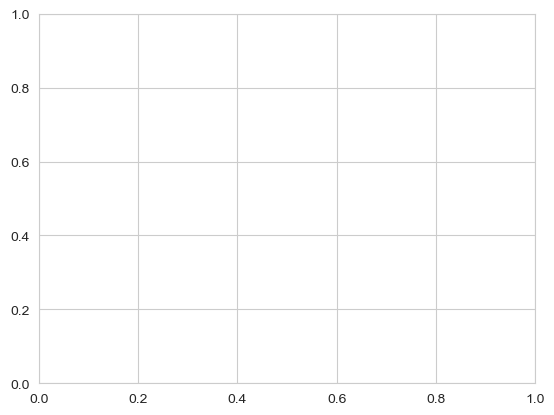

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

active_def = 'or'

for group in report['group_type'].unique():
    fig, ax = plt.subplots()
    
    baseline = report[report['disabled_embeddings'].isna()].copy()
    baseline = baseline[baseline['group_type'] == group]
    baseline = baseline[baseline['active'] == active_def]
    baseline['disabled_embeddings'] = 'all embeddings enabled'
    metrics_to_show = ['val_acc', 'test_acc']
    baseline = baseline.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')

    ablation_dfs = []
    for disabled_embeddings in ablation_study_combinations:
        if pd.isnull(disabled_embeddings):
            continue
        tmp = report[report['disabled_embeddings'] == disabled_embeddings].copy()
        tmp = tmp[tmp['group_type'] == group]
        tmp = tmp[tmp['active'] == active_def]
        tmp = tmp.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
        ablation_dfs.append(tmp)
    ablation_df = pd.concat(ablation_dfs)

    dummy_val_df = pd.DataFrame()
    tmp = report[report['group_type'] == group]
    tmp = tmp[tmp['active'] == active_def]
    dummy_val_df['score'] = tmp[['val_active_perc', 'val_inactive_perc']].max(axis=1)
    dummy_val_df['metric'] = metrics_to_show[0]
    dummy_val_df['disabled_embeddings'] = 'dummy'

    dummy_test_df = pd.DataFrame()
    dummy_test_df['score'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
    dummy_test_df['metric'] = metrics_to_show[1]
    dummy_test_df['disabled_embeddings'] = 'dummy'

    dummy_df = pd.concat([dummy_val_df, dummy_test_df])

    final_df = pd.concat([dummy_df, baseline, ablation_df])

    final_df['metric'] = final_df['metric'].map({
        'val_acc': 'Val Accuracy',
        'test_acc': 'Test Accuracy',
        'val_roc_auc': 'Val ROC-AUC',
        'test_roc_auc': 'Test ROC-AUC',
    })

    final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
        'all embeddings enabled': 'All embeddings',
        'dummy': 'Dummy model',
        'disabled smiles': 'E3, Cell, Target',
        'disabled poi e3 smiles': 'Cell only',
        'disabled poi e3 cell': 'SMILES only',
        'disabled poi': 'SMILES, E3, Cell',
        'disabled e3': 'SMILES, Cell, Target',
        'disabled cell': 'SMILES, E3, Target',
    })

    sns.barplot(data=final_df,
        x='disabled_embeddings',
        y='score',
        hue='metric',
        ax=ax,
        errorbar=('sd', 1),
        palette=sns.color_palette(adjusted_palette, len(adjusted_palette)),
        saturation=1,
    )

    ax.set_title(f'Active - {active_def.upper()} definition, {group.replace("random", "standard")} CV split')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Metric')
    ax.grid(axis='y', alpha=0.5)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(0, 1.0)
    ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    ax.set_xlabel('')
    ax.set_ylabel('')

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        value = '{:.1f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = 0.4 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, rotation=90, alpha=0.8)

    plt.tight_layout()
    plt.show()

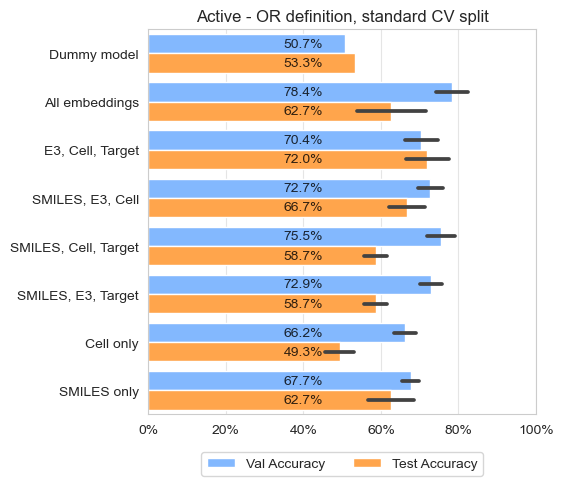

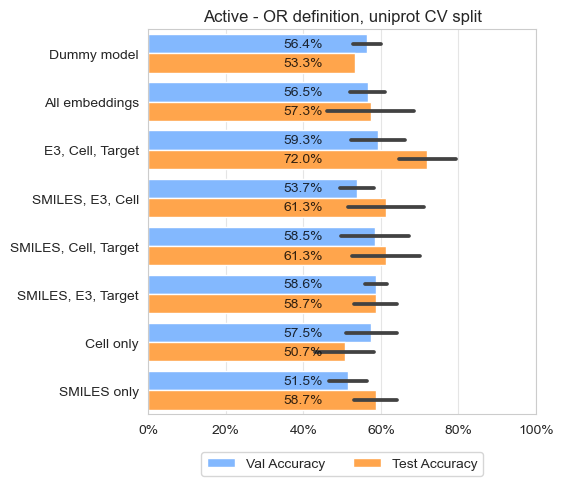

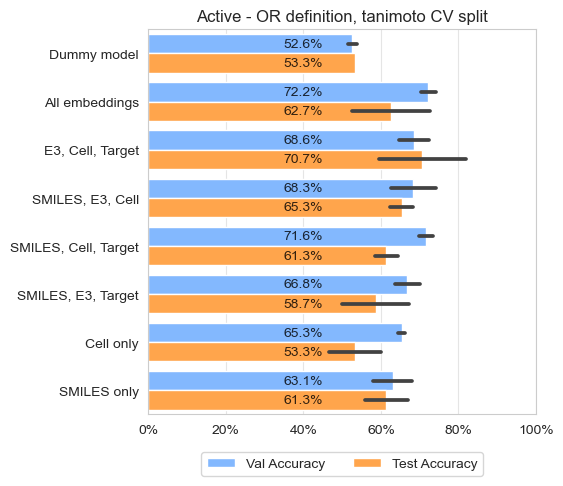

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

active_def = 'or'

for group in report['group_type'].unique():
    fig, ax = plt.subplots(figsize=(5, 5))
    
    baseline = report[report['disabled_embeddings'].isna()].copy()
    baseline = baseline[baseline['group_type'] == group]
    baseline = baseline[baseline['active'] == active_def]
    baseline['disabled_embeddings'] = 'all embeddings enabled'
    metrics_to_show = ['val_acc', 'test_acc']
    baseline = baseline.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')

    ablation_dfs = []
    for disabled_embeddings in ablation_study_combinations:
        if pd.isnull(disabled_embeddings):
            continue
        tmp = report[report['disabled_embeddings'] == disabled_embeddings].copy()
        tmp = tmp[tmp['group_type'] == group]
        tmp = tmp[tmp['active'] == active_def]
        tmp = tmp.melt(id_vars=['fold', 'disabled_embeddings'], value_vars=metrics_to_show, var_name='metric', value_name='score')
        ablation_dfs.append(tmp)
    ablation_df = pd.concat(ablation_dfs)

    dummy_val_df = pd.DataFrame()
    tmp = report[report['group_type'] == group]
    tmp = tmp[tmp['active'] == active_def]
    dummy_val_df['score'] = tmp[['val_active_perc', 'val_inactive_perc']].max(axis=1)
    dummy_val_df['metric'] = metrics_to_show[0]
    dummy_val_df['disabled_embeddings'] = 'dummy'

    dummy_test_df = pd.DataFrame()
    dummy_test_df['score'] = tmp[['test_active_perc', 'test_inactive_perc']].max(axis=1)
    dummy_test_df['metric'] = metrics_to_show[1]
    dummy_test_df['disabled_embeddings'] = 'dummy'

    dummy_df = pd.concat([dummy_val_df, dummy_test_df])

    final_df = pd.concat([dummy_df, baseline, ablation_df])

    final_df['metric'] = final_df['metric'].map({
        'val_acc': 'Val Accuracy',
        'test_acc': 'Test Accuracy',
        'val_roc_auc': 'Val ROC-AUC',
        'test_roc_auc': 'Test ROC-AUC',
    })

    final_df['disabled_embeddings'] = final_df['disabled_embeddings'].map({
        'all embeddings enabled': 'All embeddings',
        'dummy': 'Dummy model',
        'disabled smiles': 'E3, Cell, Target',
        'disabled poi e3 smiles': 'Cell only',
        'disabled poi e3 cell': 'SMILES only',
        'disabled poi': 'SMILES, E3, Cell',
        'disabled e3': 'SMILES, Cell, Target',
        'disabled cell': 'SMILES, E3, Target',
    })

    sns.barplot(data=final_df,
        y='disabled_embeddings',
        x='score',
        hue='metric',
        ax=ax,
        errorbar=('sd', 1),
        palette=sns.color_palette(adjusted_palette, len(adjusted_palette)),
        saturation=1,
    )

    ax.set_title(f'Active - {active_def.upper()} definition, {group.replace("random", "standard")} CV split')
    ax.grid(axis='x', alpha=0.5)
    ax.tick_params(axis='y', rotation=0)
    ax.set_xlim(0, 1.0)
    ax.xaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1, decimals=0))
    ax.set_ylabel('')
    ax.set_xlabel('')
    # Set the legend outside the plot and below
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=2)

    # For each bar, add the rotated value (as percentage), inside the bar
    for i, p in enumerate(plt.gca().patches):
        value = '{:.1f}%'.format(100 * p.get_width())
        y = p.get_y() + p.get_height() / 2
        x = 0.4 # p.get_height() - p.get_height() / 2
        plt.annotate(value, (x, y), ha='center', va='center', color='black', fontsize=10, alpha=0.8)

    plt.show()

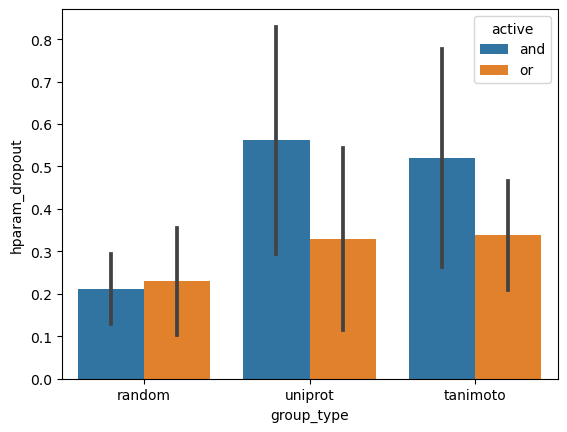

In [18]:
tmp = report[report['disabled_embeddings'].isna()]
# Barplot the dropout of the different groups
sns.barplot(data=tmp, x='group_type', y='hparam_dropout', hue='active', errorbar=('sd', 1))
plt.show()

In [20]:
tmp.columns

Index(['fold', 'group_type', 'train_len', 'val_len', 'train_perc', 'val_perc',
       'train_active_perc', 'train_inactive_perc', 'val_active_perc',
       'val_inactive_perc', 'test_active_perc', 'test_inactive_perc',
       'num_leaking_uniprot', 'num_leaking_smiles', 'disabled_embeddings',
       'val_loss', 'val_acc', 'val_f1_score', 'val_hp_metric', 'val_opt_score',
       'val_precision', 'val_recall', 'val_roc_auc', 'test_loss', 'test_acc',
       'test_f1_score', 'test_hp_metric', 'test_opt_score', 'test_precision',
       'test_recall', 'test_roc_auc', 'hparam_hidden_dim', 'hparam_batch_size',
       'hparam_learning_rate', 'hparam_dropout', 'hparam_join_embeddings',
       'hparam_smote_k_neighbors', 'train_unique_groups', 'val_unique_groups',
       'active', 'dummy_val_acc', 'dummy_test_acc'],
      dtype='object')

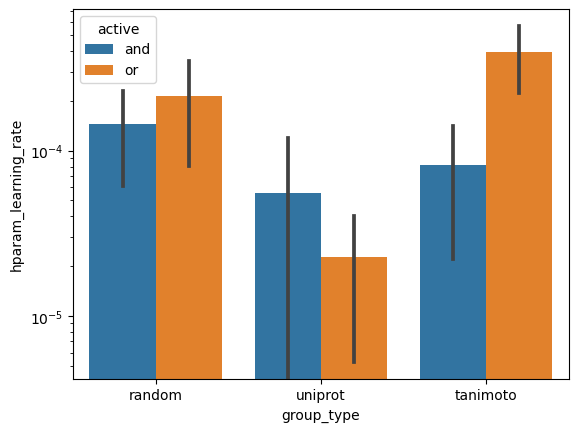

In [26]:
tmp = report[report['disabled_embeddings'].isna()]
# Barplot the dropout of the different groups
sns.barplot(data=tmp, x='group_type', y='hparam_learning_rate', hue='active', errorbar=('sd', 1))
# Set y-axis to log scale
plt.yscale('log')
plt.show()